# 1. Problem Definition
Clearly defining the business problem or question to be solved. This ensures the project's objectives are aligned with organizational goals.


**PROJECT 2** <br>
**Exploratory analysis and predictive modeling of housing prices in Barcelona using KNIME, AutoML and Power BI**

### Objective
Expand the analysis and predictive modeling of housing prices in Barcelona using advanced tools such as KNIME for ETL and analysis, Power BI for interactive visualization, and AutoML tools as a Low-Code or No-Code Machine Learning platform. The goal is to **improve the accuracy of the predictive model and provide interactive visualizations** that facilitate decision making.

# Problem Definition Consolidated Notes

- Project for predictive modeling of housing prices in Barcelona
- Project goal is to **improve the accuracy of the predictive model and provide interactive visualizations**
- Data Science project will be developed following the Data Science Life Cycle (DSLC) framework

# 2. Data Collection
Gathering relevant data from various sources, such as databases, APIs, or external datasets, ensuring it supports the problem statement.

### Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
sns.set_style('whitegrid') # set style for visualization

# To supress warnings
import warnings # ignore warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

#normalizing
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to scale the data

# modeling
import statsmodels.api as sm # adding a constant to the independent variables
from sklearn.model_selection import train_test_split # splitting data in train and test sets

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for validation
from sklearn.model_selection import cross_val_score, KFold

# Deploy
import joblib

### Loading the Dataset

In [3]:
df=pd.read_csv('DATA_Barcelona_Fotocasa_HousingPrices_Augmented.csv')

- Dataset provided by the academy

### Web Scraping

- The option of improving data using WebScraping was explored
- Attempts at self-learning were reflected in python programs "scraper_fotocasa.ipynb" and "scraper_v2.ipnb"
- Programs aimed to browse the fotocasa website and collect information following the format of the dataset provided by the academy.
- The programs were not completed, they are not functional in any version. Development of the programs was stopped on academic recommendation.
- Web scraping can raise legal and ethical considerations, especially if it involves accessing data without authorization or violating a website's terms of service.
- The academy recommended requesting permission from the web portal before continuing with development.
- The related links were read (https://www.fotocasa.es/es/politica-privacidad/p ; https://www.fotocasa.es/es/aviso-legal/cp ; https://www.fotocasa.es/es/aviso-legal/ln) and no explicit information was found regarding the authorization or prohibition of web scraping activities. 
- It is noted that the absence of explicit permission does not imply consent.
- Permission was requested from the portal and a negative response was received:

&emsp;&emsp;Hello Carlos,<br>
&emsp;&emsp;We are sorry that we cannot help you, since for privacy reasons we do not carry out this type of collaboration.<br>
&emsp;&emsp;Regards,<br>
&emsp;&emsp;ayuda@fotocasa.zendesk.com<br>

### Property types

- As the problem aims to predict housing prices in Barcelona, a brief complementary information about property types in Spain is included as reference.
    - **Studio (Estudio)**: Typically the smallest type of dwelling, a studio is a single open space that combines the living area, bedroom, and kitchen, with a separate bathroom. These are ideal for individuals or couples seeking a compact living space.
    - **Attic (Ático)**: An attic refers to a top-floor apartment, often featuring sloped ceilings and sometimes including a terrace. The size can vary, but attics are generally larger than studios and may offer unique architectural features.
    - **Apartment (Apartamento)**: In Spain, the term "apartamento" usually denotes a modest-sized dwelling, typically with one or two bedrooms. These are suitable for small families or individuals desiring separate living and sleeping areas.
    - **Flat (Piso)**: The term "piso" is commonly used to describe larger residential units, often with multiple bedrooms and ample living space. Flats are prevalent in urban areas and cater to families or individuals seeking more spacious accommodations.

# Data Collection Consolidated Notes

- The project will consider the data provided by the academy
- Web scraping involves automatically extracting data from websites, which can be subject to legal restrictions depending on the website's policies and applicable laws.
- As the problem aims to predict housing prices in Barcelona, a brief complementary information about property types in Spain is included as reference.

# 3. Data Preparation
Cleaning, preprocessing, and organizing the data. This includes handling missing values, outliers, data transformations, and feature engineering

### Data Overview

In [8]:
df.head() # preview a sample first 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3.0,1.0,True,False,60.0,flat,Horta- Guinardo,12.500000
1,1,770,2.0,1.0,True,False,59.0,flat,Sant Andreu,13.050847
2,2,1300,1.0,1.0,True,True,30.0,flat,Gràcia,43.333333
3,3,2800,1.0,1.0,True,True,70.0,flat,Ciutat Vella,40.000000
4,4,720,2.0,1.0,True,False,44.0,flat,Sant Andreu,16.363636


In [9]:
df.tail() # preview a sample last 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
16371,16371,950,1.982,0.957,True,False,60.701,flat,Sarria-Sant Gervasi,13.174
16372,16372,825,1.086,0.961,True,False,47.224,flat,Eixample,14.893
16373,16373,1200,4.195,1.957,True,False,116.100,flat,Les Corts,10.746
16374,16374,1100,2.899,2.155,False,False,57.805,flat,Sant Martí,NaN
16375,16375,850,2.127,1.024,True,False,58.503,flat,Eixample,15.390


In [10]:
df.sample(20) # preview a sample random n rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
5584,5584,3479,2.000,1.000,False,False,75.000,apartment,Sant Martí,46.386667
4457,4457,640,1.000,1.000,False,False,50.000,flat,Horta- Guinardo,12.800000
3205,3205,975,1.000,1.000,True,False,55.000,attic,Eixample,17.727273
7667,7667,655,1.000,1.000,True,False,34.000,apartment,Sants-Montjuïc,19.264706
1851,1851,1100,3.000,1.000,True,False,100.000,flat,Eixample,11.000000
10015,10015,700,2.199,1.041,False,False,59.960,flat,Ciutat Vella,12.827000
965,965,790,1.000,1.000,True,True,30.000,flat,Sarria-Sant Gervasi,26.333333
14727,14727,1350,3.286,2.054,True,True,81.534,attic,Eixample,15.383000
12525,12525,2333,2.974,1.849,False,False,92.497,apartment,Ciutat Vella,24.552000
693,693,800,1.000,1.000,True,False,45.000,flat,Sarria-Sant Gervasi,17.777778


- The variable 'Unnamed' represent index and should be deleted from data
- Target variable for modeling is "price"

In [11]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") # number of observations and features


There are 16376 rows and 10 columns.


- There are 16376 rows and 10 columns. 
- Project1 data had 8188 rows and 10 columns.

In [12]:
df.dtypes # data types

Unnamed: 0               int64
price                    int64
rooms                  float64
bathroom               float64
lift                      bool
terrace                   bool
square_meters          float64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object

- Data types are aligned with information, except variables 'rooms' and 'bathroom' being float and expected integer

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16376 non-null  int64  
 1   price                16376 non-null  int64  
 2   rooms                15966 non-null  float64
 3   bathroom             15989 non-null  float64
 4   lift                 16376 non-null  bool   
 5   terrace              16376 non-null  bool   
 6   square_meters        15968 non-null  float64
 7   real_state           15458 non-null  object 
 8   neighborhood         16376 non-null  object 
 9   square_meters_price  15937 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(2)
memory usage: 1.0+ MB


- There are missing data (NaN) on multiple variables

In [14]:
df.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16376.0,NaN,NaN,NaN,8187.5,4727.488339,0.0,4093.75,8187.5,12281.25,16375.0
price,16376.0,NaN,NaN,NaN,1437.04586,1106.831419,320.0,875.0,1100.0,1514.0,15000.0
rooms,15966.0,NaN,NaN,NaN,2.421662,1.13863,0.0,1.884,2.111,3.0,10.754
bathroom,15989.0,NaN,NaN,NaN,1.504682,0.723192,0.9,1.0,1.037,2.0,8.0
lift,16376,2,True,11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,16376,2,False,12770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,15968.0,NaN,NaN,NaN,84.368874,47.486402,10.0,56.0855,72.748,95.0,679.0
real_state,15458,4,flat,12650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,16376,10,Eixample,4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,15937.0,NaN,NaN,NaN,17.73171,9.199731,4.549,12.777778,15.31,19.402,197.272


- Units size goes from 10m2 to 679m2, with a mean of 84.36m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1437EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.549EUR/m2/month to 197.272EUR/m2/month, with mean of 17.73EUR/m2/month
- There are units listed with cero rooms and 10.754 rooms
- There are units with 0.9 bathroom

In [15]:
# Uniques
df.nunique() # Checking for number of variations in the data


Unnamed: 0             16376
price                    889
rooms                   1995
bathroom                1015
lift                       2
terrace                    2
square_meters           7751
real_state                 4
neighborhood              10
square_meters_price     9122
dtype: int64

In [16]:
df.columns

Index(['Unnamed: 0', 'price', 'rooms', 'bathroom', 'lift', 'terrace',
       'square_meters', 'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

In [17]:
for i in ['rooms', 'bathroom', 'lift', 'terrace', 'real_state', 'neighborhood']: # Checking uniques
    print (i,": ",df[i].unique())

rooms :  [3.    2.    1.    ... 4.131 4.195 2.899]
bathroom :  [1.    2.    3.    ... 5.898 2.862 2.866]
lift :  [ True False]
terrace :  [False  True]
real_state :  ['flat' 'attic' nan 'apartment' 'study']
neighborhood :  ['Horta- Guinardo' 'Sant Andreu' 'Gràcia' 'Ciutat Vella'
 'Sarria-Sant Gervasi' 'Les Corts' 'Sant Martí' 'Eixample'
 'Sants-Montjuïc' 'Nou Barris']


In [18]:
# Uniques
cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


lift
True     11246
False     5130
Name: count, dtype: int64
--------------------------------------------------
terrace
False    12770
True      3606
Name: count, dtype: int64
--------------------------------------------------
real_state
flat         12650
apartment     1967
attic          633
study          208
Name: count, dtype: int64
--------------------------------------------------
neighborhood
Eixample               4795
Sarria-Sant Gervasi    2765
Ciutat Vella           2716
Gràcia                 1416
Sant Martí             1257
Sants-Montjuïc         1165
Les Corts              1045
Horta- Guinardo         638
Sant Andreu             368
Nou Barris              211
Name: count, dtype: int64
--------------------------------------------------


- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"

In [19]:
# Display all rows in pandas outputs
pd.set_option("display.max_rows", None)  # Set to None to show all rows

# Print the value counts of 'rooms'
print(df['rooms'].value_counts())
print("-" * 50)
print(df['bathroom'].value_counts())

# Optionally reset display settings (if needed later in the script)
pd.reset_option("display.max_rows")


rooms
2.000     2608
3.000     2461
1.000     1600
4.000     1061
0.000      399
5.000      232
6.000       28
0.910       19
0.981       15
1.029       14
0.945       14
0.917       14
1.973       13
1.012       13
0.938       13
1.076       13
1.804       12
1.872       12
0.937       12
0.956       12
3.046       12
1.954       12
1.087       12
2.119       12
2.056       12
1.046       12
2.004       12
1.904       12
1.015       12
2.126       12
0.947       12
1.882       12
1.840       12
2.122       11
1.095       11
1.897       11
3.017       11
3.237       11
1.008       11
1.884       11
2.169       11
2.153       11
2.156       11
2.147       11
0.914       11
1.072       11
0.990       11
1.042       11
2.123       11
1.898       11
2.196       11
1.981       11
0.926       11
1.092       11
1.056       11
1.952       11
2.072       11
0.921       11
2.030       10
1.088       10
1.865       10
2.192       10
1.917       10
0.970       10
2.068       10
1.051       10
0.97

- the variable 'rooms' will require feature engineering
- the variable 'bathroom' will require feature engineering

In [20]:

room_counts_list = []
# Iterate through each integer value of rooms
for i in range(1, 1 + int(max(df['rooms']))):
    count = df['rooms'][df['rooms'] == i].count()  # Count occurrences for the current value
    room_counts_list.append({'rooms': i, 'count': count})  # Add result to the list

# Convert the list of dictionaries into a DataFrame
room_counts = pd.DataFrame(room_counts_list)

#calculate totals
int_rooms=room_counts['count'].sum()

room_counts['int_prop']=room_counts['count']/int_rooms
room_counts['net_prop']=room_counts['count']/16376
room_counts

,rooms,count,int_prop,net_prop
0,1,1600,0.200000,0.097704
1,2,2608,0.326000,0.159257
2,3,2461,0.307625,0.150281
3,4,1061,0.132625,0.064790
4,5,232,0.029000,0.014167
5,6,28,0.003500,0.001710
6,7,5,0.000625,0.000305
7,8,0,0.000000,0.000000
8,9,2,0.000250,0.000122
9,10,3,0.000375,0.000183


In [21]:
print(f'The total number of observations with an integer number for variable "rooms" is {room_counts['count'].sum()}, this represents {room_counts['net_prop'].sum()*100:.2f}% of total observations')

The total number of observations with an integer number for variable "rooms" is 8000, this represents 48.85% of total observations


In [22]:
bathroom_counts_list = []
# Iterate through each integer value of rooms
for i in range(1, 1 + int(max(df['bathroom']))):
    count = df['bathroom'][df['bathroom'] == i].count()  # Count occurrences for the current value
    bathroom_counts_list.append({'bathroom': i, 'count': count})  # Add result to the list

# Convert the list of dictionaries into a DataFrame
bathroom_counts = pd.DataFrame(bathroom_counts_list)

#calculate totals
int_bathroom=bathroom_counts['count'].sum()

bathroom_counts['int_prop']=bathroom_counts['count']/int_rooms
bathroom_counts['net_prop']=bathroom_counts['count']/16376
bathroom_counts

,bathroom,count,int_prop,net_prop
0,1,4873,0.609125,0.297570
1,2,2742,0.342750,0.167440
2,3,421,0.052625,0.025708
3,4,121,0.015125,0.007389
4,5,41,0.005125,0.002504
5,6,9,0.001125,0.000550
6,7,1,0.000125,0.000061
7,8,2,0.000250,0.000122


In [23]:
print(f'The total number of observations with an integer number for variable "bathroom" is {bathroom_counts['count'].sum()}, this represents {bathroom_counts['net_prop'].sum()*100:.2f}% of total observations')

The total number of observations with an integer number for variable "bathroom" is 8210, this represents 50.13% of total observations


- Considering high proportion of invalid values (not integer) on variables 'rooms' and 'bathroom' (51.15% and 49.87%), and Project2 dataset is stated as an augmented version of Project1 dataset, is interpreted Project1 dataframe was augmented adding artificial data to make it larger, and in this process of **Data Augmentation** those observations with decimal values where not corrected to integers in Project2 dataset.

In [24]:
# Duplicates
print(df.duplicated().sum()) # Checking for duplicate entries in the data

0


- There are no duplicated observations

### Missing Value handling

In [103]:
df2=df.copy()

In [104]:
null_counts = df2.isnull().sum()
null_percentage = (null_counts / len(df2)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts,'Null Percentage': null_percentage.round(2)})
null_summary

,Null Count,Null Percentage
Unnamed: 0,0,0.00
price,0,0.00
rooms,410,2.50
bathroom,387,2.36
lift,0,0.00
terrace,0,0.00
square_meters,408,2.49
real_state,918,5.61
neighborhood,0,0.00
square_meters_price,439,2.68


In [27]:
mask1 = df2["square_meters"].isna() & df2["price"].notna() & df2["square_meters_price"].notna()
df2.loc[mask1, "square_meters"] = df2["price"] / df2["square_meters_price"]
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price    439
dtype: int64

- 389 out of 408 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"

In [28]:
mask2 = df2["square_meters"].notna() & df2["price"].notna() & df2["square_meters_price"].isna()
df2.loc[mask2, "square_meters_price"] = df2["price"] / df2["square_meters"]
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price     19
dtype: int64

- 420 out of 439 missing "square_meters_price" values are imputed considering relation "price" / "square_meters"

In [29]:
df2[(df2['square_meters_price'].isnull())&(df2['square_meters'].isnull())]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
8748,8748,1300,4.392,1.980,True,False,NaN,flat,Eixample,NaN
8784,8784,850,0.950,0.995,False,False,NaN,flat,Sants-Montjuïc,NaN
9118,9118,925,2.175,0.924,True,False,NaN,flat,Gràcia,NaN
9321,9321,895,NaN,1.877,True,False,NaN,flat,Sants-Montjuïc,NaN
9442,9442,800,0.924,1.092,False,False,NaN,flat,Horta- Guinardo,NaN
9519,9519,995,2.858,2.161,False,True,NaN,flat,Eixample,NaN
10167,10167,1218,3.686,2.140,True,False,NaN,flat,Sarria-Sant Gervasi,NaN
11180,11180,600,NaN,0.917,True,True,NaN,flat,Sants-Montjuïc,NaN
11496,11496,945,1.009,0.962,True,True,NaN,attic,Sarria-Sant Gervasi,NaN
11959,11959,850,3.039,NaN,True,False,NaN,flat,Horta- Guinardo,NaN


- There are 19 properties missing values on both "square_meters" and "square_meters_price"

In [30]:
df2['square_meters_price'] = df2['square_meters_price'].fillna(df2.groupby(['real_state', 'neighborhood'])['square_meters_price'].transform('mean'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price      0
dtype: int64

- 19 missing "square_meters_price" values are imputed with the most relevant mean based on the "real_state" and "neighborhood".

In [31]:
df2.loc[df2['square_meters'].isna(), 'square_meters'] = df2['price'] / df2['square_meters_price']
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state             918
neighborhood             0
square_meters_price      0
dtype: int64

- 19 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"

In [32]:
# Compute the most common (mode) real_state for each neighborhood
mode_real_state = df2.groupby("neighborhood")["real_state"].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill missing values in real_state based on the mode of each neighborhood
df2["real_state"] = df2["real_state"].fillna(df2["neighborhood"].map(mode_real_state))

df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state               0
neighborhood             0
square_meters_price      0
dtype: int64

- Imputed missing "real_state" values by filling them with the most common (mode) "real_state" for each "neighborhood".

In [33]:
#df2['rooms'] = df2['rooms'].fillna(df2.groupby(['real_state', 'neighborhood'])['rooms'].transform('mean'))
df2['rooms'] = df2['rooms'].fillna(df2.groupby(['real_state', 'neighborhood'])['rooms'].transform('median'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                    0
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state               0
neighborhood             0
square_meters_price      0
dtype: int64

- 410 missing "rooms" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

In [34]:
#df2['bathroom'] = df2['bathroom'].fillna(df2.groupby(['real_state', 'neighborhood'])['bathroom'].transform('mean'))
df2['bathroom'] = df2['bathroom'].fillna(df2.groupby(['real_state', 'neighborhood'])['bathroom'].transform('median'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0             0
price                  0
rooms                  0
bathroom               0
lift                   0
terrace                0
square_meters          0
real_state             0
neighborhood           0
square_meters_price    0
dtype: int64

- 387 missing "bathroom" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

### Feature engineering

In [35]:
df3=df2.copy()

In [36]:
df3=df3.drop(['Unnamed: 0'],axis=1)
df3.head()

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,750,3.0,1.0,True,False,60.0,flat,Horta- Guinardo,12.500000
1,770,2.0,1.0,True,False,59.0,flat,Sant Andreu,13.050847
2,1300,1.0,1.0,True,True,30.0,flat,Gràcia,43.333333
3,2800,1.0,1.0,True,True,70.0,flat,Ciutat Vella,40.000000
4,720,2.0,1.0,True,False,44.0,flat,Sant Andreu,16.363636


- Removed the variable "Unnamed: 0" which had no value for modeling

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  float64
 2   bathroom             16376 non-null  float64
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 927.7+ KB


In [38]:
df3['rooms'] = df3['rooms'].apply(lambda x: 1 if x < 1 else round(x)).astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  int64  
 2   bathroom             16376 non-null  float64
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(2)
memory usage: 927.7+ KB


In [39]:
df3['bathroom'] = df3['bathroom'].apply(lambda x: 1 if x < 1 else round(x)).astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  int64  
 2   bathroom             16376 non-null  int64  
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 927.7+ KB


- Transformed the values of "rooms" and "bathroom" into an integer using the following logic:
    - Values under 1 → Set to 1
    - Values 1 or above → Round to the nearest integer
- Variables "rooms" and "bathroom" set as integer 

In [40]:
df3.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,16376.0,NaN,NaN,NaN,1437.04586,1106.831419,320.0,875.0,1100.0,1514.0,15000.0
rooms,16376.0,NaN,NaN,NaN,2.447545,1.078844,1.0,2.0,2.0,3.0,11.0
bathroom,16376.0,NaN,NaN,NaN,1.495237,0.714843,1.0,1.0,1.0,2.0,8.0
lift,16376,2,True,11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,16376,2,False,12770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,16376.0,NaN,NaN,NaN,84.357363,47.454864,10.0,56.048,72.689,95.0,679.0
real_state,16376,4,flat,13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,16376,10,Eixample,4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,16376.0,NaN,NaN,NaN,17.727253,9.185362,4.549,12.773723,15.315158,19.389167,197.272


### Outliers detection and treatment

In [41]:
# function to check for outliers
def count_outliers(df):
    outlier_count=0
    for column in df.select_dtypes(include=np.number).columns:
        outliers=len(df[(df[column] < df[column].quantile(0.25)-1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))) | (df[column] > df[column].quantile(0.75)+1.5*(df[column].quantile(0.75)-df[column].quantile(0.25)))][column])
        print(f'{column}: {outliers} outliers ({outliers/df.shape[0]*100:.2f}%)')
        outlier_count+= outliers
    return outlier_count

In [59]:
df4=df3.copy()

In [60]:
count_outliers(df)

Unnamed: 0: 0 outliers (0.00%)
price: 1778 outliers (10.86%)
rooms: 870 outliers (5.31%)
bathroom: 308 outliers (1.88%)
square_meters: 1177 outliers (7.19%)
square_meters_price: 1165 outliers (7.11%)


5298

In [61]:
df.shape

(16376, 10)

In [62]:
count_outliers(df4)

price: 1778 outliers (10.86%)
rooms: 505 outliers (3.08%)
bathroom: 308 outliers (1.88%)
square_meters: 1206 outliers (7.36%)
square_meters_price: 1201 outliers (7.33%)


4998

In [63]:
df4.shape

(16376, 9)

In [64]:
# Z-Score Method
df5=df4[(np.abs(df4.select_dtypes(include=np.number).apply(zscore))<3).all(axis=1)] #drop over 3 standard deviations
count_outliers(df5)

price: 1345 outliers (8.67%)
rooms: 236 outliers (1.52%)
bathroom: 0 outliers (0.00%)
square_meters: 899 outliers (5.80%)
square_meters_price: 897 outliers (5.78%)


3377

In [65]:
df5.shape

(15511, 9)

- Applied the Z-score method, which removes outliers with more than 3 standard deviations.
- Some variables with a relevant percentage of outliers still remain. df5_shape:(15511, 9)

In [ ]:
df6=df5.copy()
for column in df6.select_dtypes(include=np.number).columns:
    df6[column]=np.clip(df6[column], df6[column].quantile(0.25)-1.5*(df6[column].quantile(0.75)-df6[column].quantile(0.25)), df6[column].quantile(0.75)+1.5*(df6[column].quantile(0.75)-df6[column].quantile(0.25)))
df6.shape

(15511, 9)

In [67]:
count_outliers(df6)

price: 0 outliers (0.00%)
rooms: 0 outliers (0.00%)
bathroom: 0 outliers (0.00%)
square_meters: 0 outliers (0.00%)
square_meters_price: 0 outliers (0.00%)


0

- Limiting outliers at whiskers (winsorization) is considered due to the nature of the data
- The 8.67% outliers on 'price' requires winsorization to prevent them from dominating the model.
- Applying winsorization can hide valuable trends in luxury or budget properties, but in this case the extreme prices are assumed to be errors or anomalies in the synthetic or augmented data, so applying winsorization will make the model more robust to those outliers.

In [87]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                15511 non-null  int64  
 1   rooms                15511 non-null  float64
 2   bathroom             15511 non-null  int64  
 3   lift                 15511 non-null  bool   
 4   terrace              15511 non-null  bool   
 5   square_meters        15511 non-null  float64
 6   real_state           15511 non-null  object 
 7   neighborhood         15511 non-null  object 
 8   square_meters_price  15511 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(2)
memory usage: 999.7+ KB


In [86]:
df6.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,15511.0,NaN,NaN,NaN,1208.368577,466.369265,320.0,850.0,1080.0,1400.0,2225.0
rooms,15511.0,NaN,NaN,NaN,2.379795,0.983835,1.0,2.0,2.0,3.0,4.5
bathroom,15511.0,NaN,NaN,NaN,1.421249,0.571376,1.0,1.0,1.0,2.0,3.0
lift,15511,2,True,10655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,15511,2,False,12233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,15511.0,NaN,NaN,NaN,77.271685,29.612008,10.0,55.692186,71.265,91.5405,145.312971
real_state,15511,4,flat,13087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,15511,10,Eixample,4516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,15511.0,NaN,NaN,NaN,16.41234,5.032319,5.555556,12.7095,15.151515,18.992,28.41575


- When capping outliers to whisker, the value calculation (1.5*IQR) affected the variable 'rooms' requiring again to set as integer

In [93]:
df6['rooms'] = df6['rooms'].astype(int) # truncate decimals
#df6['rooms'] = df6['rooms'].round().astype(int) # Round decimals
#df6['rooms'] = np.ceil(df6['rooms']).astype(int) # RoundUP decimals
#df6['rooms'] = np.floor(df6['rooms']).astype(int) # RoundDOWN decimals

In [94]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                15511 non-null  int64  
 1   rooms                15511 non-null  int64  
 2   bathroom             15511 non-null  int64  
 3   lift                 15511 non-null  bool   
 4   terrace              15511 non-null  bool   
 5   square_meters        15511 non-null  float64
 6   real_state           15511 non-null  object 
 7   neighborhood         15511 non-null  object 
 8   square_meters_price  15511 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 999.7+ KB


In [95]:
df6.describe(include="all").T # statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,15511.0,NaN,NaN,NaN,1208.368577,466.369265,320.0,850.0,1080.0,1400.0,2225.0
rooms,15511.0,NaN,NaN,NaN,2.372187,0.969235,1.0,2.0,2.0,3.0,4.0
bathroom,15511.0,NaN,NaN,NaN,1.421249,0.571376,1.0,1.0,1.0,2.0,3.0
lift,15511,2,True,10655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,15511,2,False,12233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,15511.0,NaN,NaN,NaN,77.271685,29.612008,10.0,55.692186,71.265,91.5405,145.312971
real_state,15511,4,flat,13087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,15511,10,Eixample,4516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,15511.0,NaN,NaN,NaN,16.41234,5.032319,5.555556,12.7095,15.151515,18.992,28.41575


### Data Management

In [96]:
df.to_csv('df5_CLEAN_DATA_Barcelona_Fotocasa_HousingPrices_Augmented.csv', index=False)  # Save without index

- Saved csv file after data preparation for backup and further analysis

# Data Preparation Consolidated Notes

**Data Overview**
- The variable 'Unnamed' represent index and should be deleted from data
- Target variable for modeling is "price"
- There are 16376 rows and 10 columns. 
- Project1 data had 8188 rows and 10 columns.
- Data types are aligned with information, except variables 'rooms' and 'bathroom' being float and expected integer
- There are missing data (NaN) on multiple variables
- Units size goes from 10m2 to 679m2, with a mean of 84.36m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1437EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.549EUR/m2/month to 197.272EUR/m2/month, with mean of 17.73EUR/m2/month
- There are units listed with cero rooms and 10.754 rooms
- There are units with 0.9 bathroom
- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"
- The variable 'rooms' will require feature engineering
- The variable 'bathroom' will require feature engineering
- The total number of observations with an integer number for variable "rooms" is 8000, this represents 48.85% of total observations
- The total number of observations with an integer number for variable "bathroom" is 8210, this represents 50.13% of total observations
- Considering high proportion of invalid values (not integer) on variables 'rooms' and 'bathroom' (51.15% and 49.87%), and Project2 dataset is stated as an augmented version of Project1 dataset, is interpreted Project1 dataset was augmented adding artificial data to make it larger, and in this process of **Data Augmentation** those observations with decimal values where not corrected to integers into Project2 dataset.
- There are no duplicated observations

**Missing Value handling**
- 389 out of 408 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"
- 420 out of 439 missing "square_meters_price" values are imputed considering relation "price" / "square_meters"
- There are 19 properties missing values on both "square_meters" and "square_meters_price"
- 19 missing "square_meters_price" values are imputed with the most relevant mean based on the "real_state" and "neighborhood".
- 19 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"
- Imputed missing "real_state" values by filling them with the most common (mode) "real_state" for each "neighborhood".
- 408 missing "rooms" values are imputed with the most relevant median based on the "real_state" and "neighborhood".
- 387 missing "bathroom" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

**Feature engineering**
- Removed the variable 
"Unnamed: 0" which had no value for modeling
- Transformed the values of "rooms" and "bathroom" into an integer using the following logic:
    - Values under 1 → Set to 1
    - Values 1 or above → Round to the nearest integer
- Variables "rooms" and "bathroom" set as integer

**Outliers detection and treatment**
- Applied the Z-score method, which removes outliers with more than 3 standard deviations.
- Some variables with a relevant percentage of outliers still remain. df5_shape:(15511, 9)
- Limiting outliers at whiskers (winsorization) is considered due to the nature of the data
- The 8.67% outliers on 'price' requires winsorization to prevent them from dominating the model.
- Applying winsorization can hide valuable trends in luxury or budget properties, but in this case the extreme prices are assumed to be errors or anomalies in the synthetic or augmented data, so applying winsorization will make the model more robust to those outliers.
- When capping outliers to whisker, the value calculation (1.5*IQR) affected the variable 'rooms' requiring again to set as integer

**Data Management**
- Saved csv file after data preparation for backup and further analysis

# 4. Exploratory Data Analysis (EDA)
Analyzing the data to understand patterns, relationships, and potential anomalies. This step often involves data visualization and statistical analysis to generate insights.

### EDA Functions

In [75]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [76]:
def univariate_categorical(data):
    '''
    Function to generate countplot for each categorical variable
    Labeled with count and percentage
    '''
    # List of categorical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Number of columns in the grid
    num_cols = 4
    
    # Calculate the number of rows needed
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    # Create the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each countplot in the grid
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f'Count of {col}')
           
        # Add total count and percentage annotations
        total = len(data)
        for p in plot.patches:
            height = p.get_height()
            percentage = f'{(height / total * 100):.1f}%'
            plot.text(x=p.get_x() + p.get_width() / 2,
                      y=height + 2,
                      s=f'{height:.0f}\n({percentage})',
                      ha='center')
        
        # Limit x-axis labels to avoid overlap
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Show the plot
    plt.show()


In [77]:
# Function to plot crosstab with labels
def plot_crosstab_bar_count(df, var_interest):
    '''
    Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables
    Labeled with counts
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[var_interest])
        
        # Plot the crosstab as a bar plot
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        
        # Annotate counts in the middle of each bar section
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                axes[i].annotate(f'{int(height)}', 
                                 (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                 ha='center', va='center', fontsize=10, color='black')
        
        # Add total labels at the top of each bar
        totals = crosstab.sum(axis=1)
        for j, total in enumerate(totals):
            axes[i].annotate(f'Total: {total}', 
                             (j, totals[j]), 
                             ha='center', va='bottom', weight='bold')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_bar_count(df, var_interest='var_interest')

In [78]:
def plot_crosstab_heat_perc(df, var_interest,df_name="DataFrame"):
    '''
    Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables
    Labeled with counts, percentage by row, percentage by column
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, num_rows * 6))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create crosstabs
        crosstab = pd.crosstab(df[col], df[var_interest])
        crosstab_perc_row = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        crosstab_perc_col = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

        # Combine counts with percentages
        crosstab_combined = crosstab.astype(str) + "\n" + \
                            crosstab_perc_row.round(2).astype(str) + "%" + "\n" + \
                            crosstab_perc_col.round(2).astype(str) + "%"

        # Plot the crosstab as a heatmap
        sns.heatmap(crosstab, annot=crosstab_combined, fmt='', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 8})
        axes[i].set_title(f'Crosstab of {col} and {var_interest} - {df_name}', fontsize=12)

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent label overlapping
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Add more space between subplots
    plt.tight_layout()
    plt.show()
    
# Usage
#plot_crosstab_heat_perc(df, var_interest='var_interest')

In [79]:
def boxplot_by_group(df, group, var, outliers, df_name="DataFrame"):
    '''
    boxplot for a numerical variable of interest vs a categorical variable
    with or without outliers
    includes data mean and mean by category
    '''
    # Calculate the average for the variable
    var_avg = df[var].mean()
    
    # Calculate variable mean per group
    var_means = df.groupby(group)[var].mean()
    
    # Sort by means and get the sorted order
    var_sorted = var_means.sort_values(ascending=False).index
    
    # Reorder the DataFrame by the sorted group
    df[group] = pd.Categorical(df[group], categories=var_sorted, ordered=True)
    
    # Create the boxplot with the reordered sectors
    ax = sns.boxplot(data=df, x=group, y=var, order=var_sorted, showfliers=outliers)
    
    # Add horizontal line for average variable value
    plt.axhline(var_avg, color='red', linestyle='--', label=f'Avg {var}: {var_avg:.2f}')
    
    # Scatter plot for means
    x_positions = range(len(var_means.sort_values(ascending=False)))
    plt.scatter(x=x_positions, y=var_means.sort_values(ascending=False), color='red', label='Mean', zorder=5)
    
    # Add labels to each red dot with the mean value
    for i, mean in enumerate(var_means.sort_values(ascending=False)):
        plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom')
    
    # Rotate x-axis labels
    plt.xticks(ticks=x_positions, labels=var_means.sort_values(ascending=False).index, rotation=90)
    
    # Add a legend
    plt.legend()
    plt.xlabel('')  # Remove x-axis title
    
    # Add plot title with DataFrame name
    plt.title(f'Boxplot of {var} by {group} - {df_name}')
    
    # Adjust layout
    plt.tight_layout()
    
    # Display the plot
    #plt.show()

    # Get the top 3 categories
    top_3_categories = var_means.sort_values(ascending=False).head(3).index.tolist()
    top_3=",".join(top_3_categories)
    # Print the top 3 categories
    print(f'Top 3 {group} by {var} mean value are: {top_3}')

In [80]:
# Define the function to create and display side-by-side boxplots
def side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # First subplot for df1
    plt.sca(axes[0])
    boxplot_by_group(df1, group, var, outliers, title1)
    
    # Second subplot for df2
    plt.sca(axes[1])
    boxplot_by_group(df2, group, var, outliers, title2)
    
    # Show both plots after setup
    plt.show()

# Usage
#side_by_side_boxplot(df, df_pop, 'neighborhood', 'price', True, "All units (show outliers)", "Popular units (show outliers)")

**Functions**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category
- side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2): to present two side by side boxplot_by_group

### Univariate Analysis

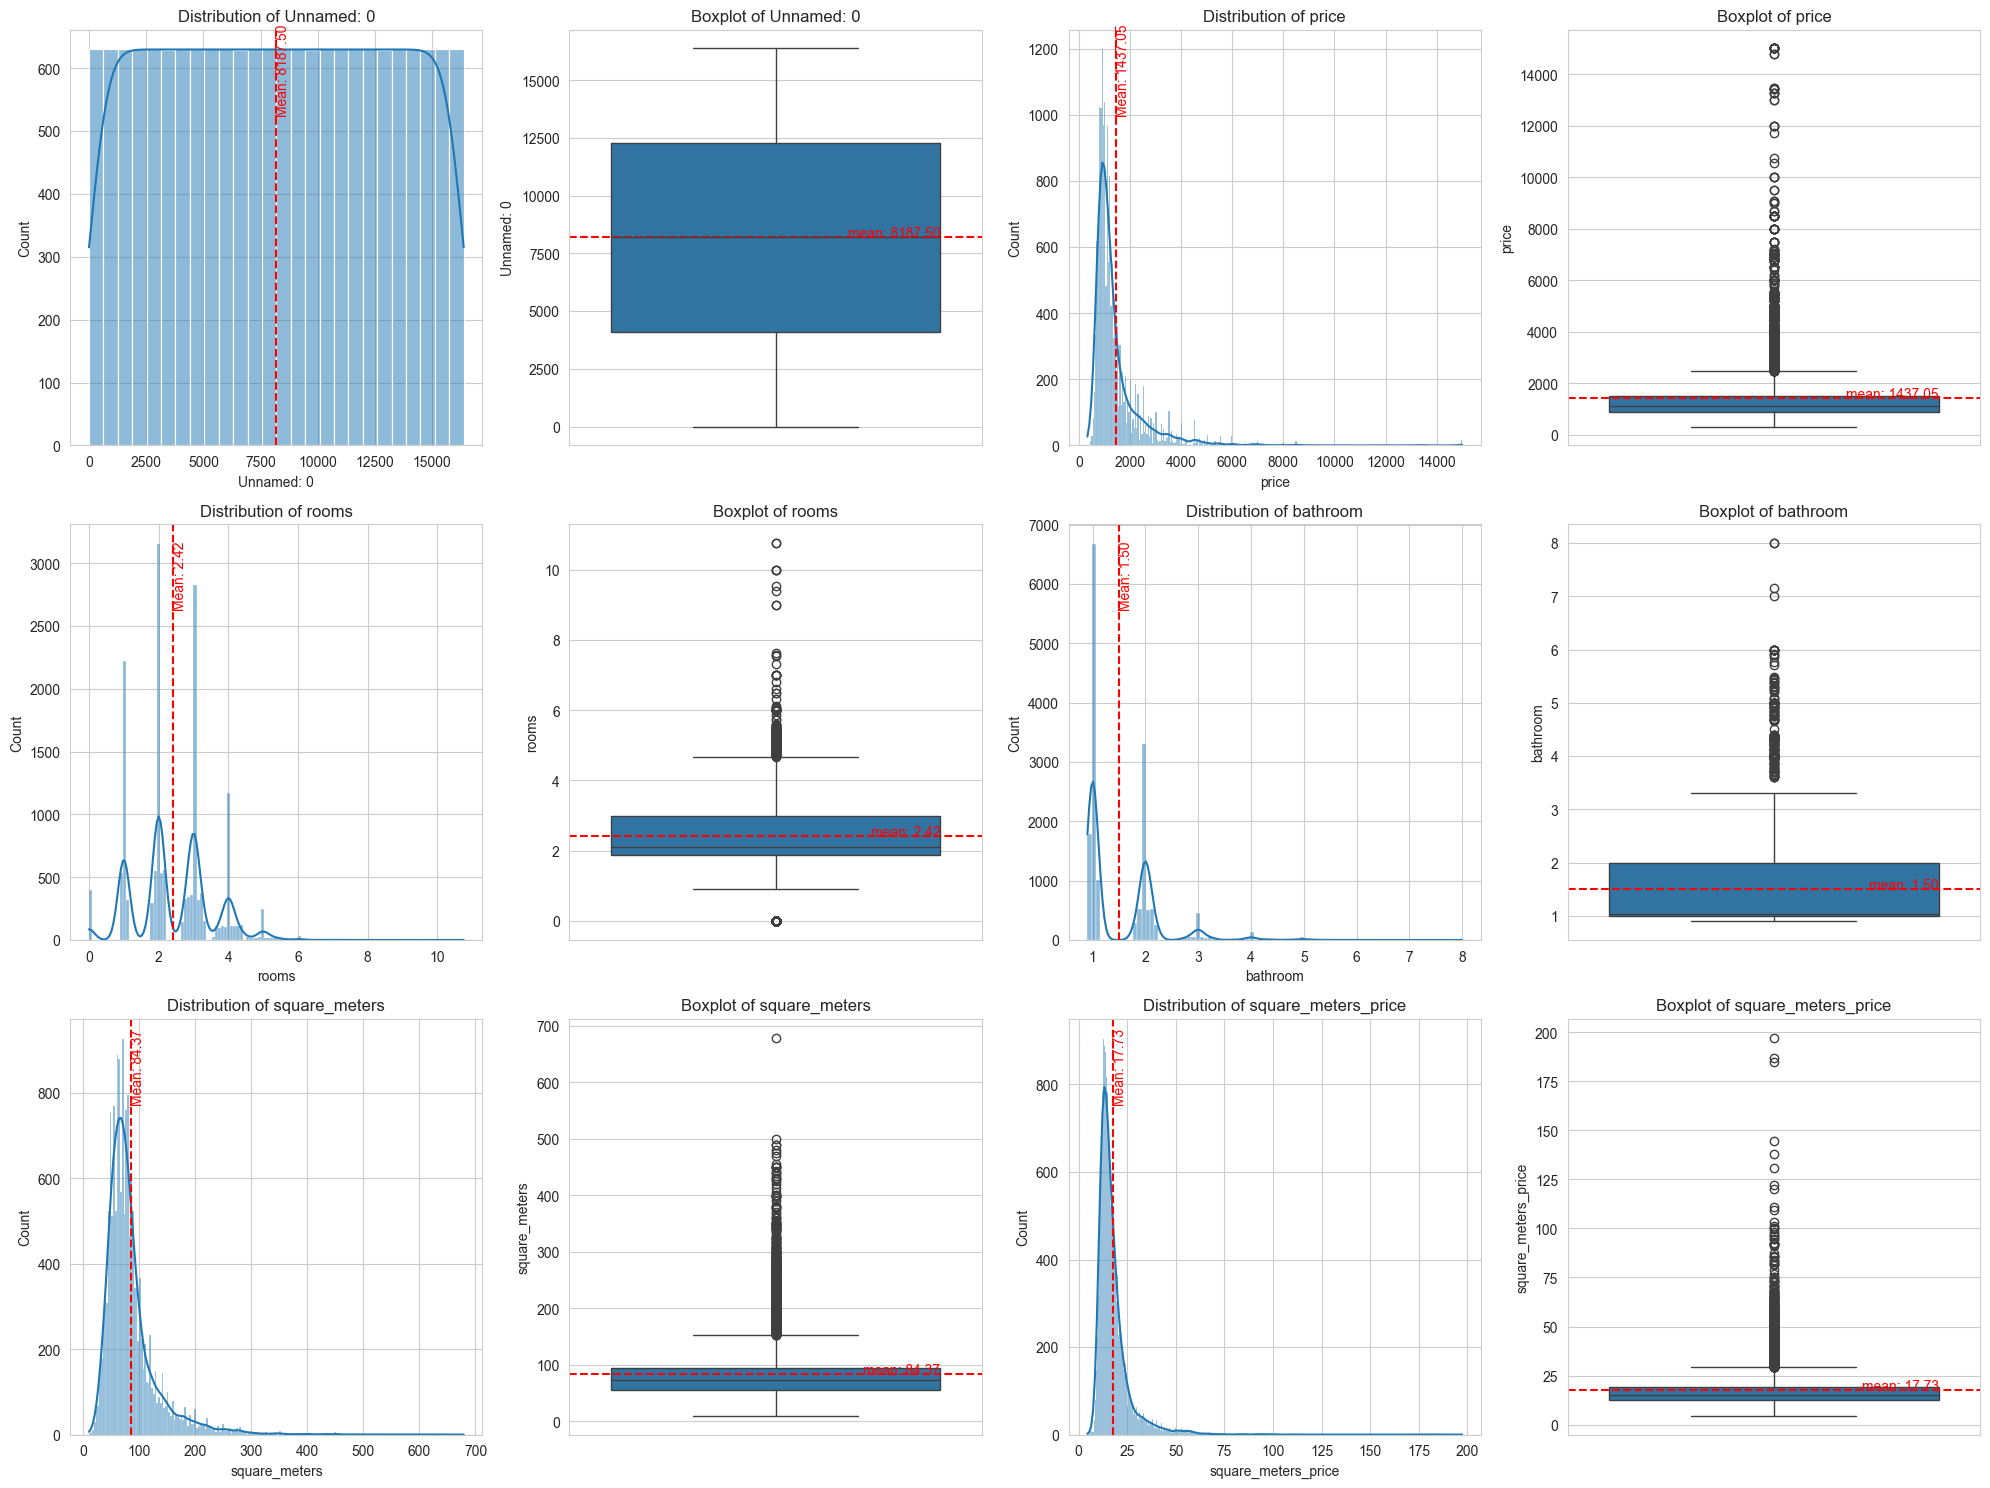

In [83]:
univariate_numerical(df)

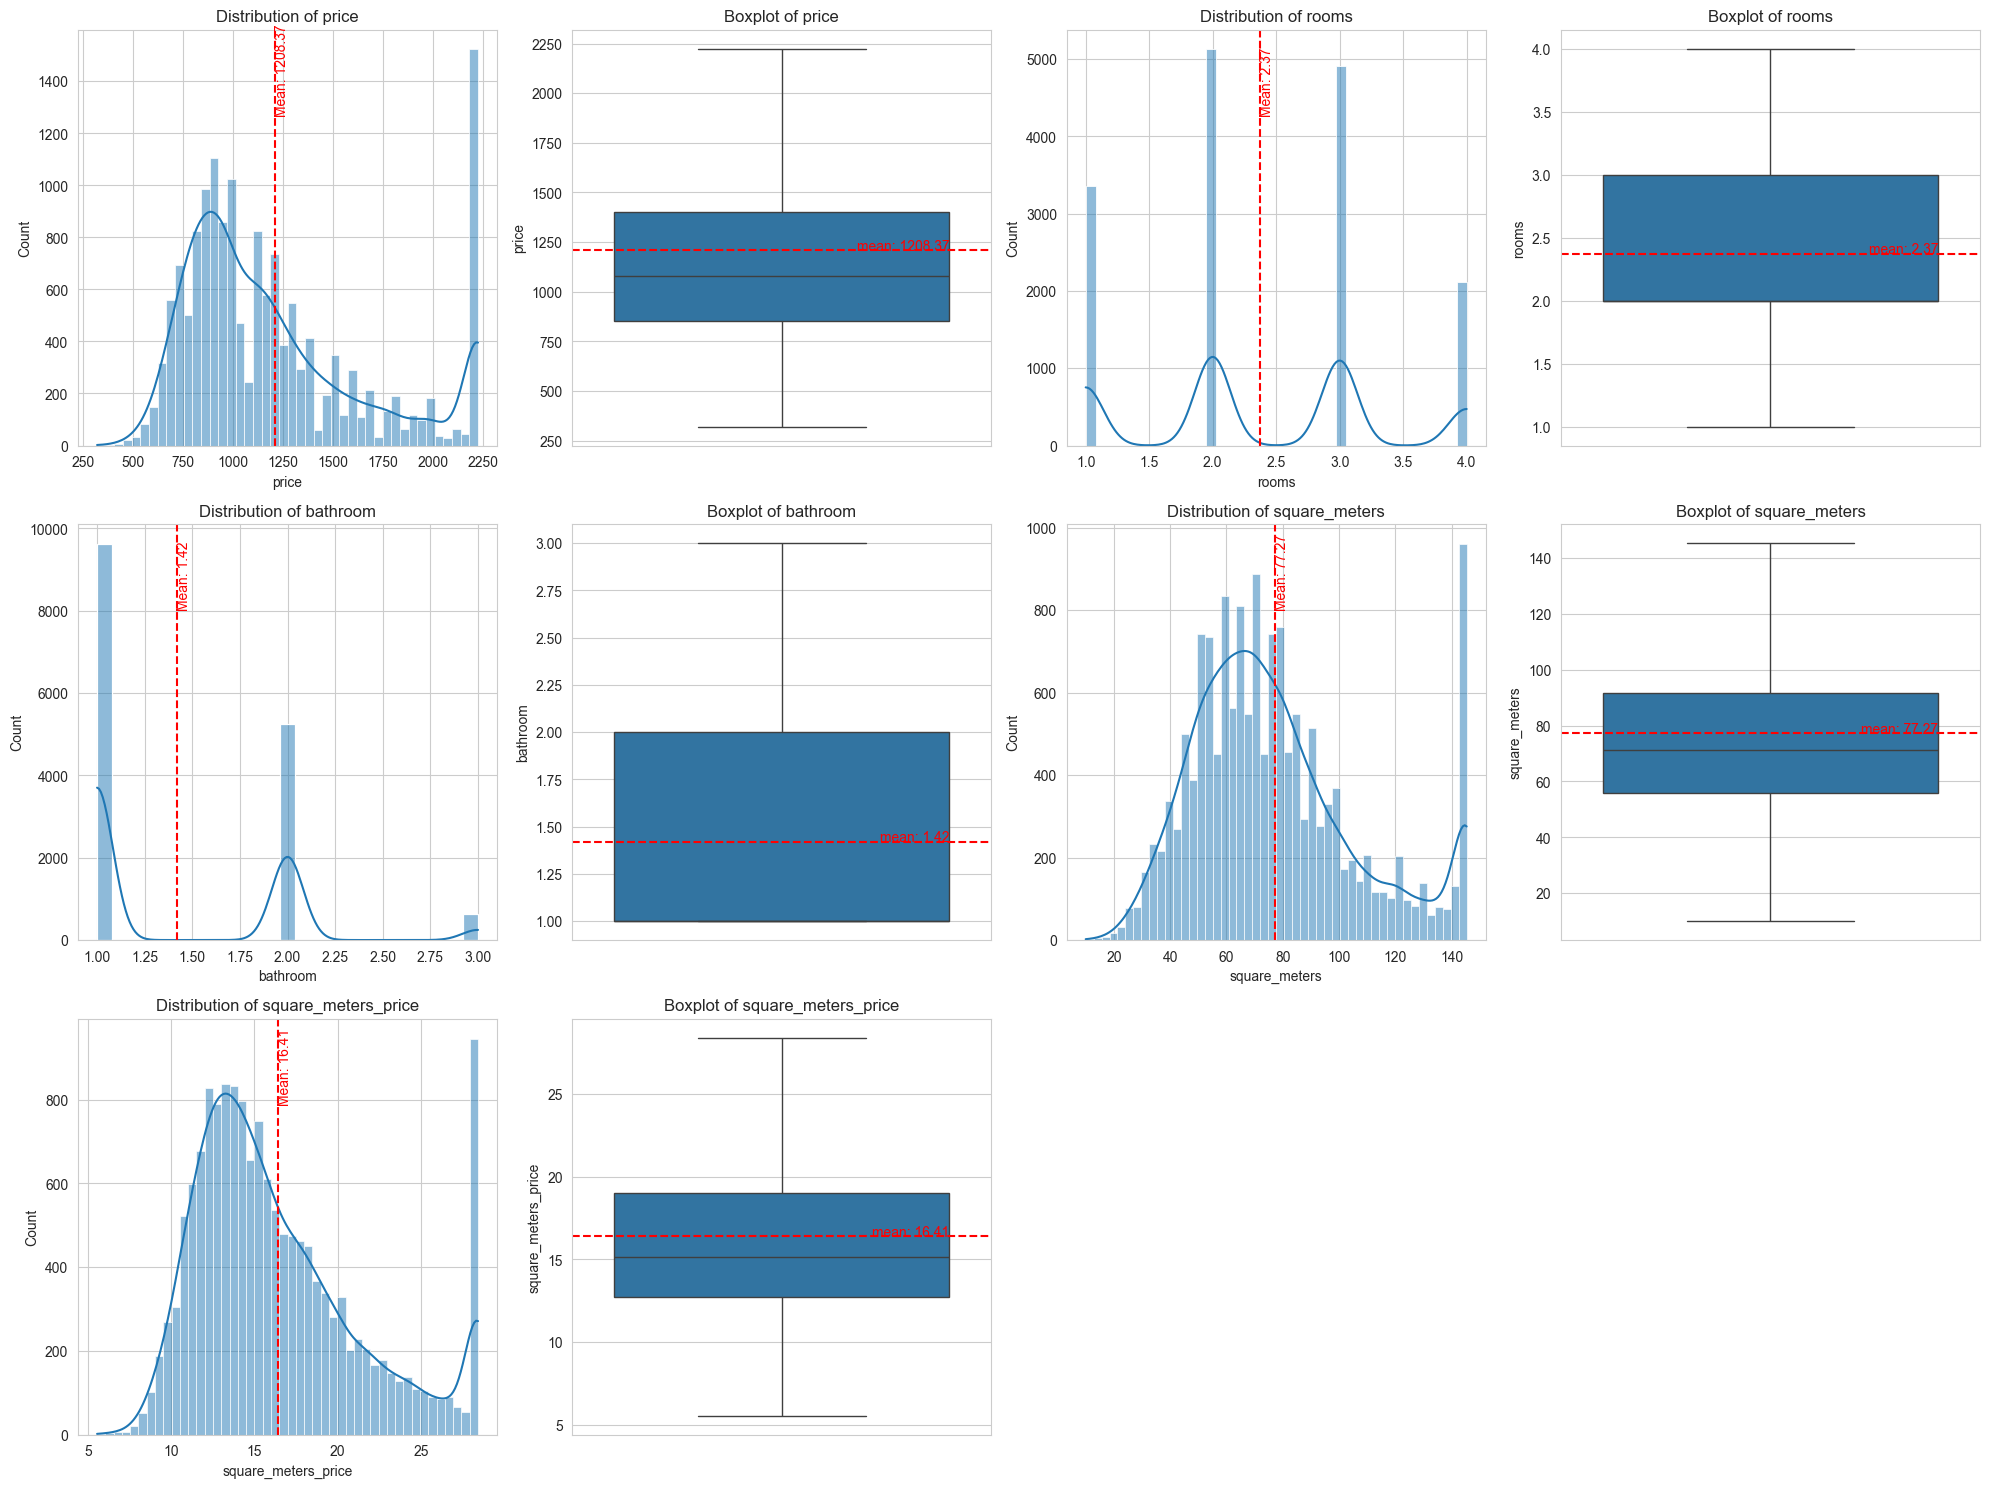

In [97]:
univariate_numerical(df6)

- 'price', 'square_meters' and 'square_meters_price' variables are right skewed and reflect the effect of capping outliers to upper whysker.
- Comparing original data (df) vs. prepared data (df6) is noticeable how in original data the numerical variables have float type values and many outliers, while in prepared data the numerical variables have integer values and no outliers.

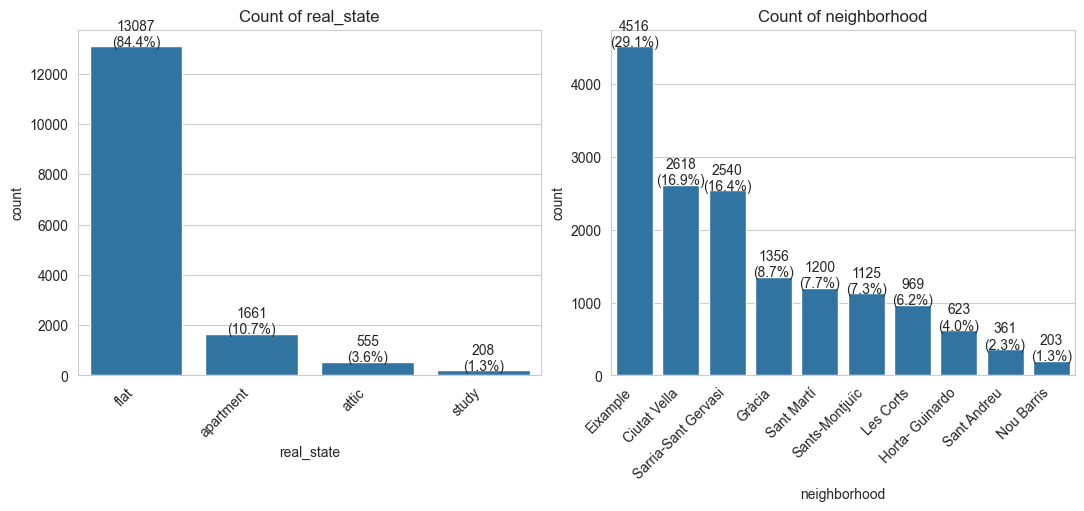

In [98]:
univariate_categorical(df6)

In [99]:
df6.loc[(df6['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
price,13087.0,1168.944143,435.697239,320.000000,850.00,1050.000,1330.500000,2225.000000
rooms,13087.0,2.454955,0.959010,1.000000,2.00,2.000,3.000000,4.000000
bathroom,13087.0,1.434477,0.574801,1.000000,1.00,1.000,2.000000,3.000000
square_meters,13087.0,78.670241,29.130045,13.181000,58.00,73.206,92.856500,145.312971
square_meters_price,13087.0,15.556758,4.392135,5.555556,12.47,14.555,17.756644,28.415750


In [101]:
df.loc[(df['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12650.0,8038.174625,4750.342568,0.000000,3887.250000,7965.5000,12162.75000,16375.000
price,12650.0,1311.412490,917.152962,320.000000,865.000000,1050.0000,1352.00000,15000.000
rooms,12351.0,2.551887,1.091363,0.000000,2.000000,2.7380,3.03600,10.754
bathroom,12380.0,1.509471,0.715738,0.900000,1.000000,1.0405,2.00000,8.000
square_meters,12352.0,85.484011,45.657731,10.540000,59.000000,74.7985,95.64450,679.000
square_meters_price,12322.0,15.707694,5.333934,5.555556,12.437625,14.5000,17.67775,103.176


- In the prepared data there are flats units with 4 rooms and 145m2 area.
- The variable 'real_state' have 918 imputed values (5.61%)
- In the original data there are flats units with 10.754 rooms and 679m2 area.
- The "large flats" units in the data are asummed as real/valid data and not affected by Data Preparation.

In [100]:
df6.loc[(df6['neighborhood']=="Eixample")].describe().T

,count,mean,std,min,25%,50%,75%,max
price,4516.0,1268.222099,464.694153,425.000,900.00000,1150.000000,1500.000000,2225.000000
rooms,4516.0,2.456156,0.959457,1.000,2.00000,2.000000,3.000000,4.000000
bathroom,4516.0,1.465456,0.569745,1.000,1.00000,1.000000,2.000000,3.000000
square_meters,4516.0,80.216411,29.079080,16.197,59.37800,75.135500,95.000000,145.312971
square_meters_price,4516.0,16.623776,5.147722,6.074,12.82675,15.174735,19.446333,28.415750


- The categorical variables are not balanced, with 84.4% of properties as "flats" and 78.8% of units concentrated in 50% of the sample neighbourhoods
- 75% of flats units have up to 3 bedrooms and up to 2 bathrooms with an average size of 85.48m2.
- 75% of the units in Eixample have up to 3 bedrooms and up to 2 bathrooms with an average size of 80.21m2.

### Bivariate Analysis

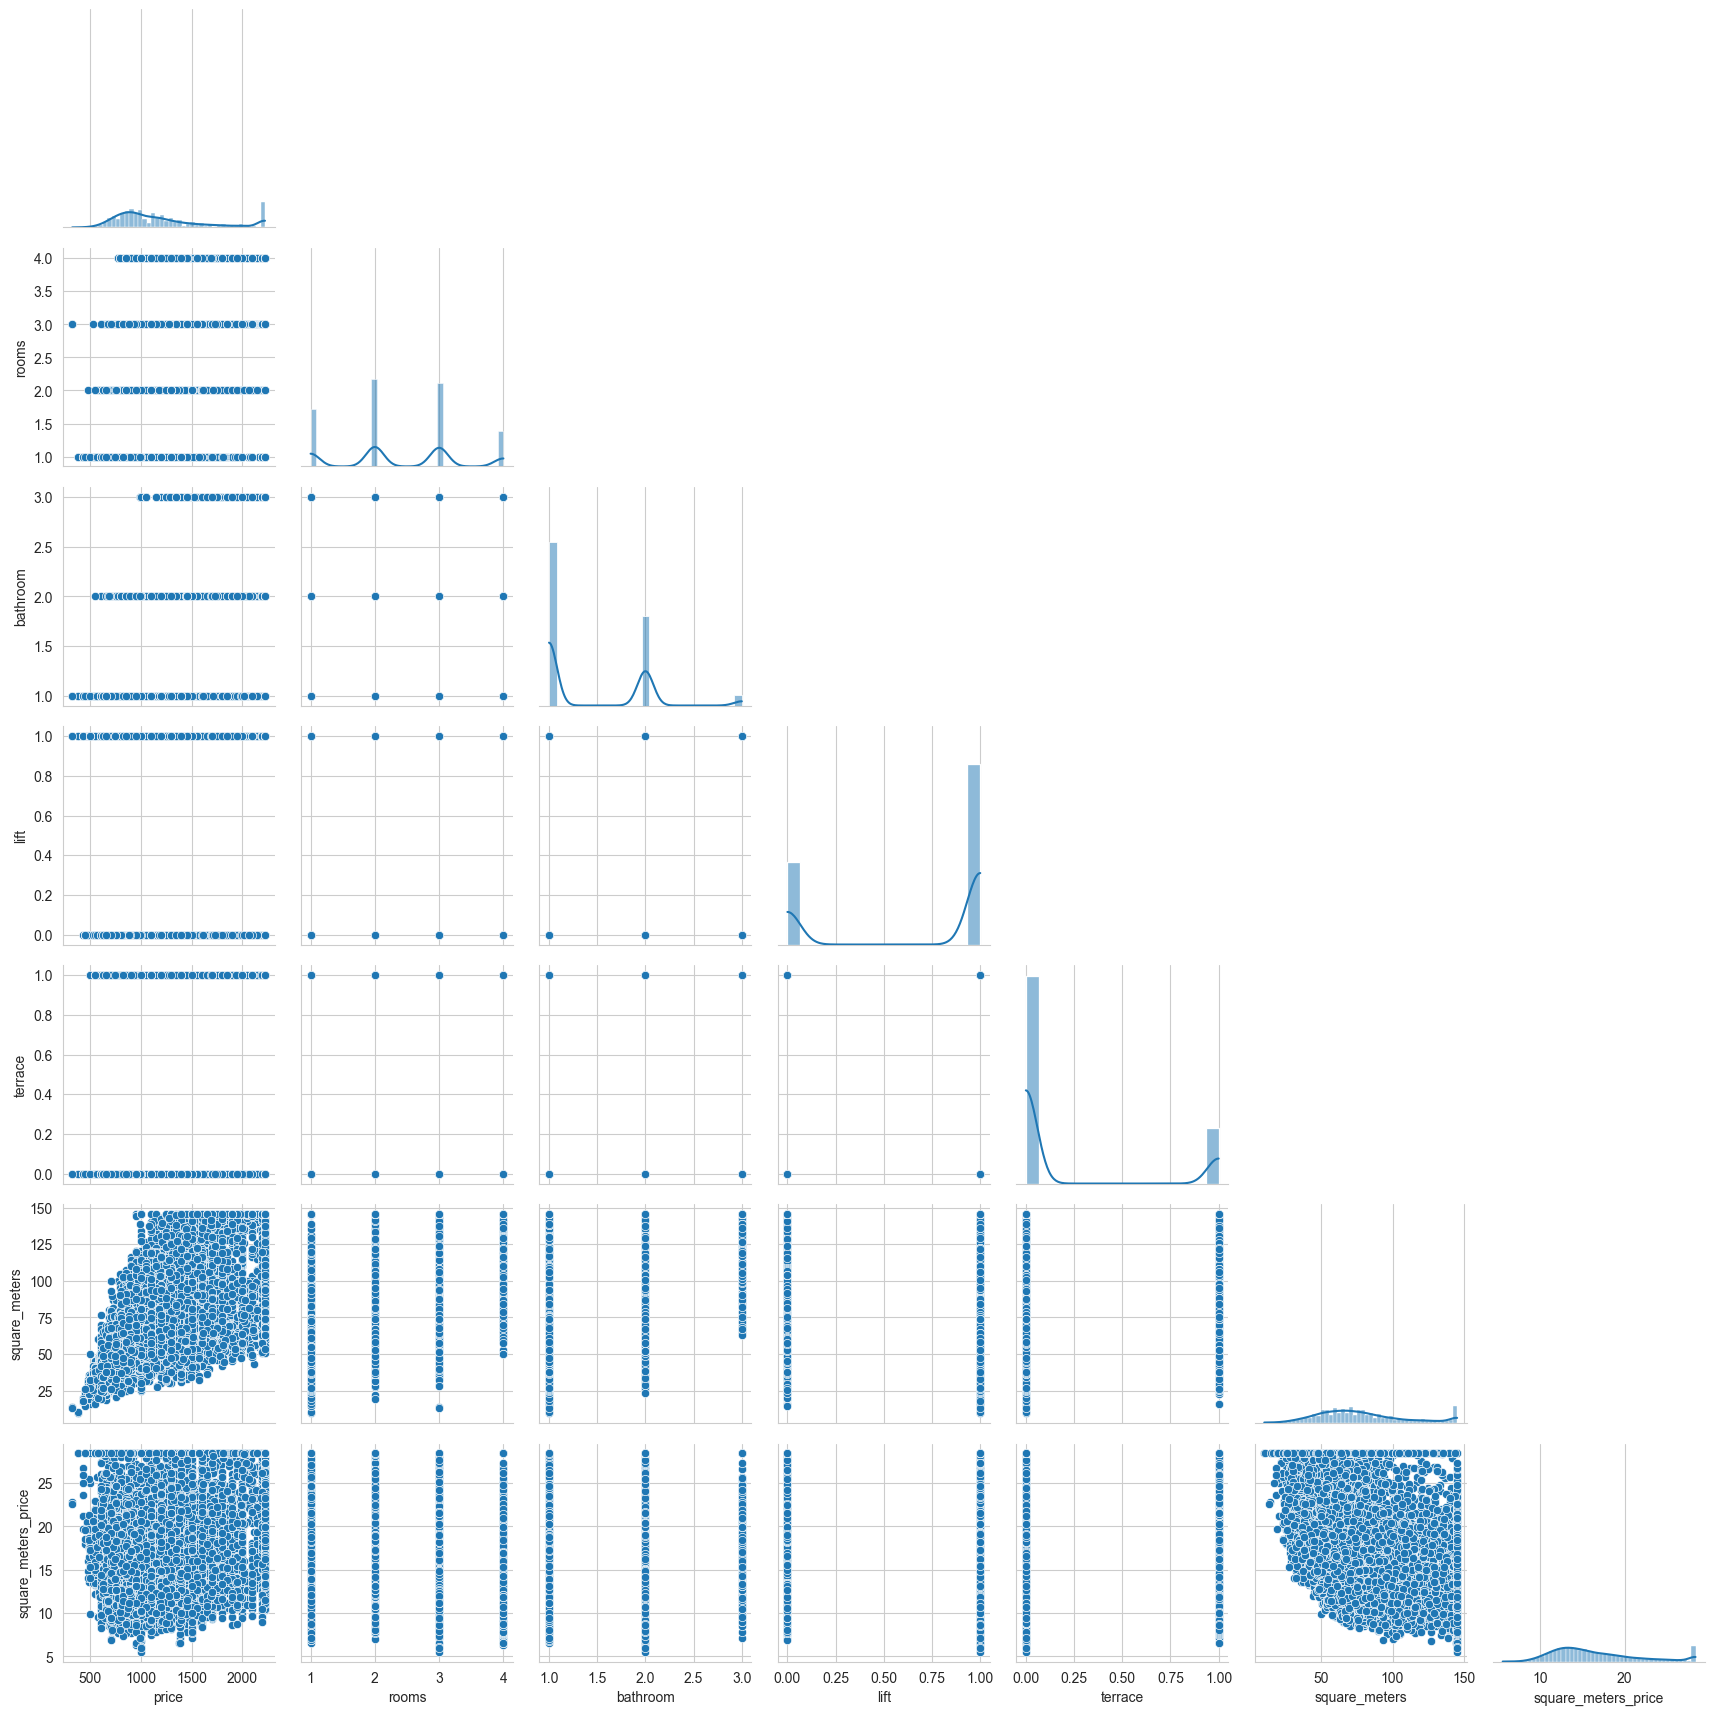

In [105]:
# Create a PairGrid
g = sns.PairGrid(df6, corner=True)

# Map different plots to the grid
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot,kde=True)

# Show the plot
plt.show()

In [106]:
# Calculate correlation matrix
corr_matrix = df6.select_dtypes(include=np.number).corr()

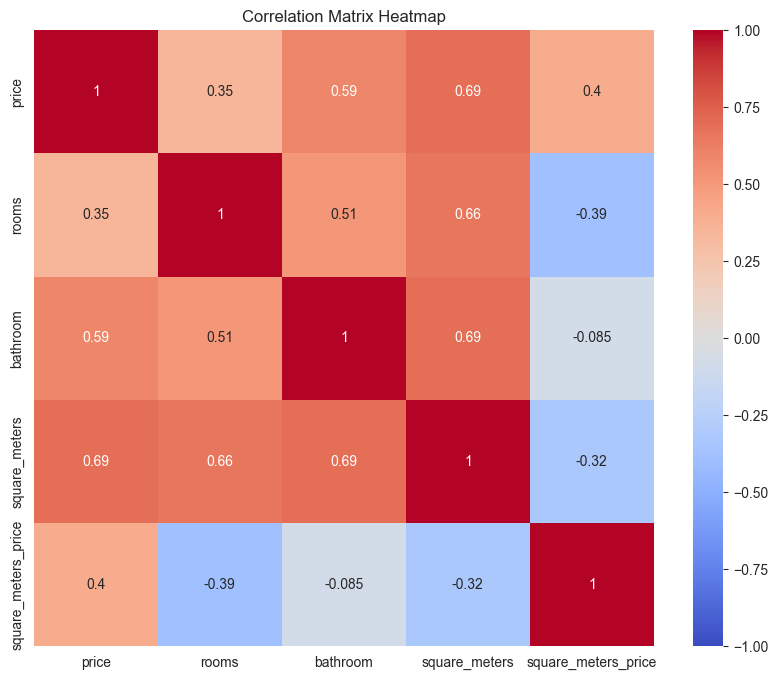

In [107]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [108]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', key=abs, ascending=False) # Sort the DataFrame by the absolute value of correlation
#sorted_corr # Display the sorted correlation table

In [109]:
# Define a function to categorize the correlation level
def categorize_correlation(correlation):
    abs_corr = abs(correlation) * 100  # Convert to percentage for easier comparison
    if abs_corr < 30:
        return 'Negligible'
    elif 30 <= abs_corr < 50:
        return 'Low'
    elif 50 <= abs_corr < 70:
        return 'Moderate'
    elif 70 <= abs_corr < 90:
        return 'High'
    else:
        return 'Very High'


In [110]:
# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)
sorted_corr['corr_lvl'].value_counts()


corr_lvl
Moderate      5
Low           4
Negligible    1
Name: count, dtype: int64

In [111]:
sorted_corr

,variable1,variable2,correlation,corr_lvl
13,bathroom,square_meters,0.693373,Moderate
3,price,square_meters,0.690122,Moderate
8,rooms,square_meters,0.663109,Moderate
2,price,bathroom,0.586832,Moderate
7,rooms,bathroom,0.508548,Moderate
4,price,square_meters_price,0.403112,Low
9,rooms,square_meters_price,-0.386088,Low
1,price,rooms,0.351463,Low
19,square_meters,square_meters_price,-0.322290,Low
14,bathroom,square_meters_price,-0.084502,Negligible


- There are no couple of variables with high correlation (>75%)

Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts


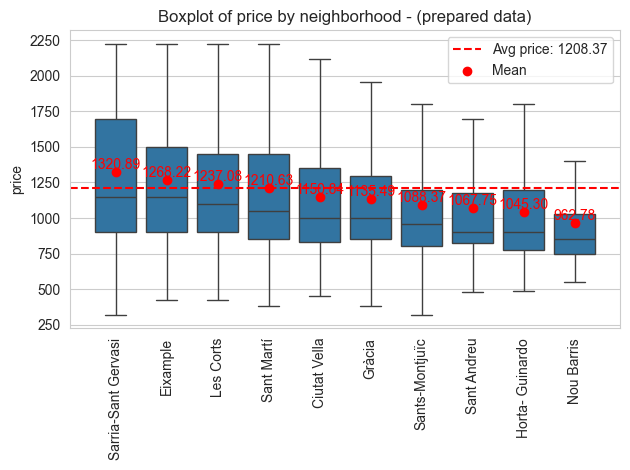

In [118]:
boxplot_by_group(df6, 'neighborhood', 'price', False, df_name="(prepared data)")

Top 3 neighborhood by square_meters mean value are: Sarria-Sant Gervasi,Les Corts,Eixample


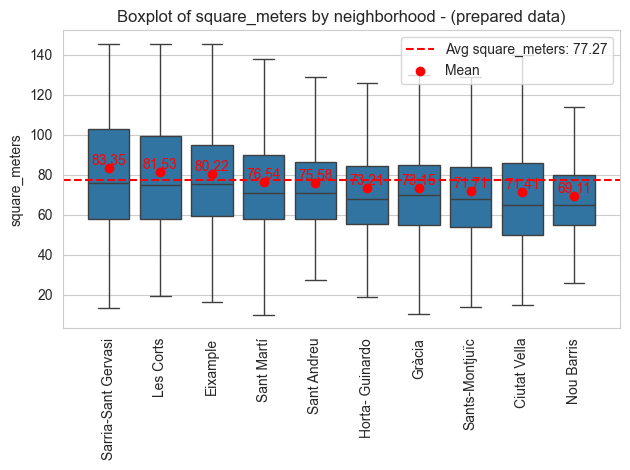

In [117]:
boxplot_by_group(df6, 'neighborhood', 'square_meters', False, df_name="(prepared data)")

Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample


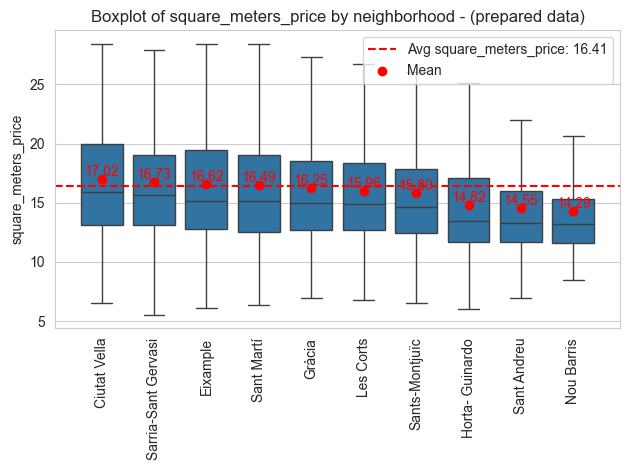

In [116]:
boxplot_by_group(df6, 'neighborhood', 'square_meters_price', False, df_name="(prepared data)")

Top 3 real_state by price mean value are: apartment,attic,flat


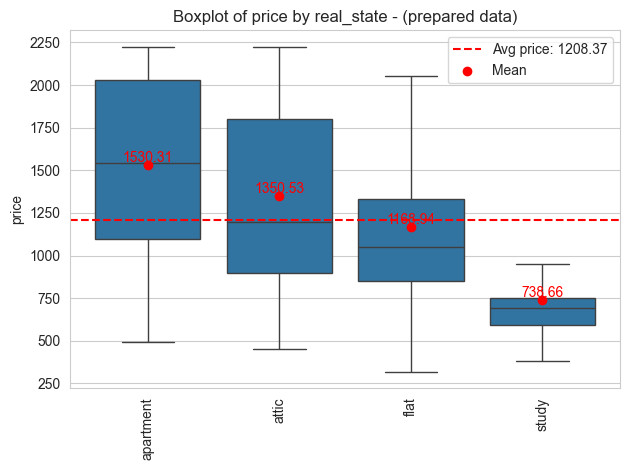

In [119]:
boxplot_by_group(df6, 'real_state', 'price', False, df_name="(prepared data)")

Top 3 real_state by square_meters mean value are: flat,attic,apartment


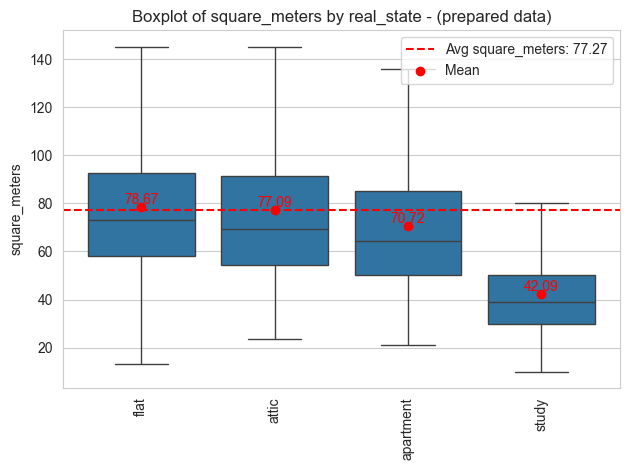

In [120]:
boxplot_by_group(df6, 'real_state', 'square_meters', False, df_name="(prepared data)")

Top 3 real_state by square_meters_price mean value are: apartment,study,attic


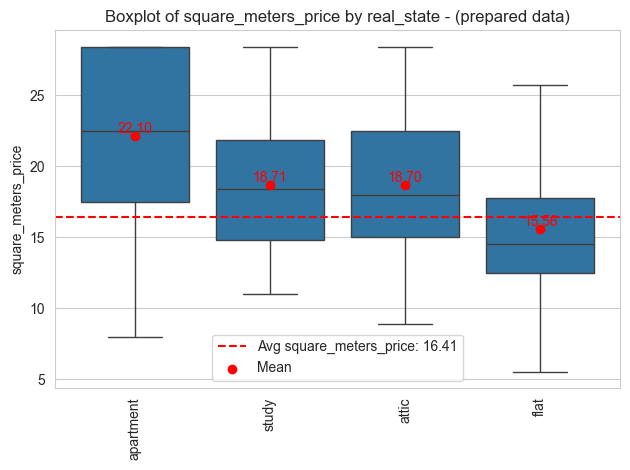

In [121]:
boxplot_by_group(df6, 'real_state', 'square_meters_price', False, df_name="(prepared data)")

- Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts
- Top 3 neighborhood by square_meters mean value are: Sarria-Sant Gervasi,Les Corts,Eixample
- Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample
- Top 3 real_state by price mean value are: apartment,attic,flat
- Top 3 real_state by square_meters mean value are: flat,attic,apartment
- Top 3 real_state by square_meters_price mean value are: apartment,study,attic
- From the perspective of price per square meter, the most attractive type of unit according to this data could be the **flat**, with an average surface area of ​78.67 m2 (just over the average 77.27 m2) and a price per square meter of 15.56 below the average (16.41)

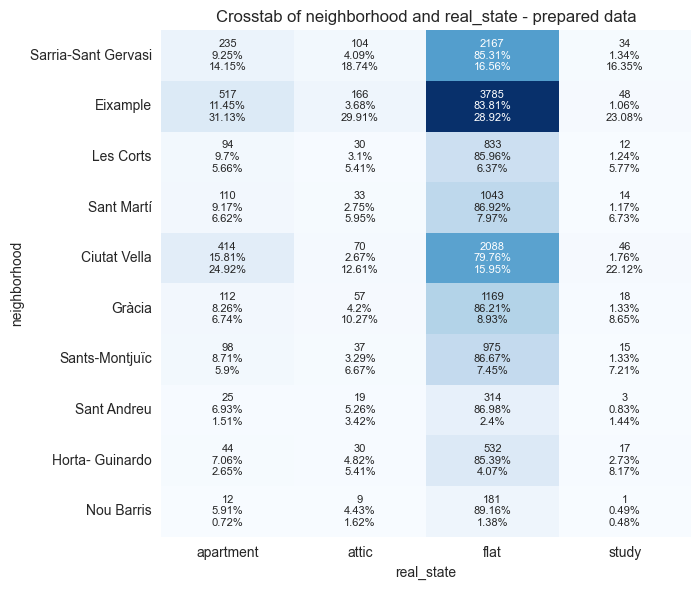

In [122]:
plot_crosstab_heat_perc(df6, var_interest='real_state',df_name="prepared data")

- There are 3785 flats in Eixample, being the most popular unit type and neighborhood combination, with 83.81% of the units in Eixample being flats, and 28.92% of all flats are located at Eixample. 
- Across all neighborhoods, the unit type "flat" is the most popular with at least 79.76% of units by neighborhood

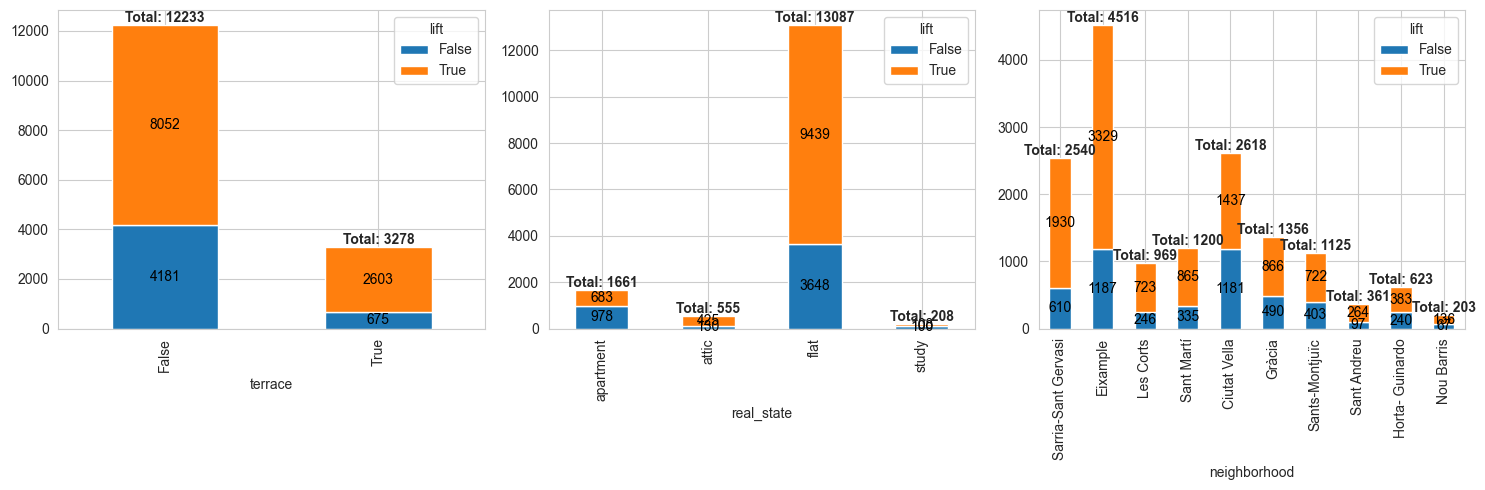

In [123]:
plot_crosstab_bar_count(df6, var_interest='lift')

- Most types of units have a lift, in the case of flats the proportion is 72.12%

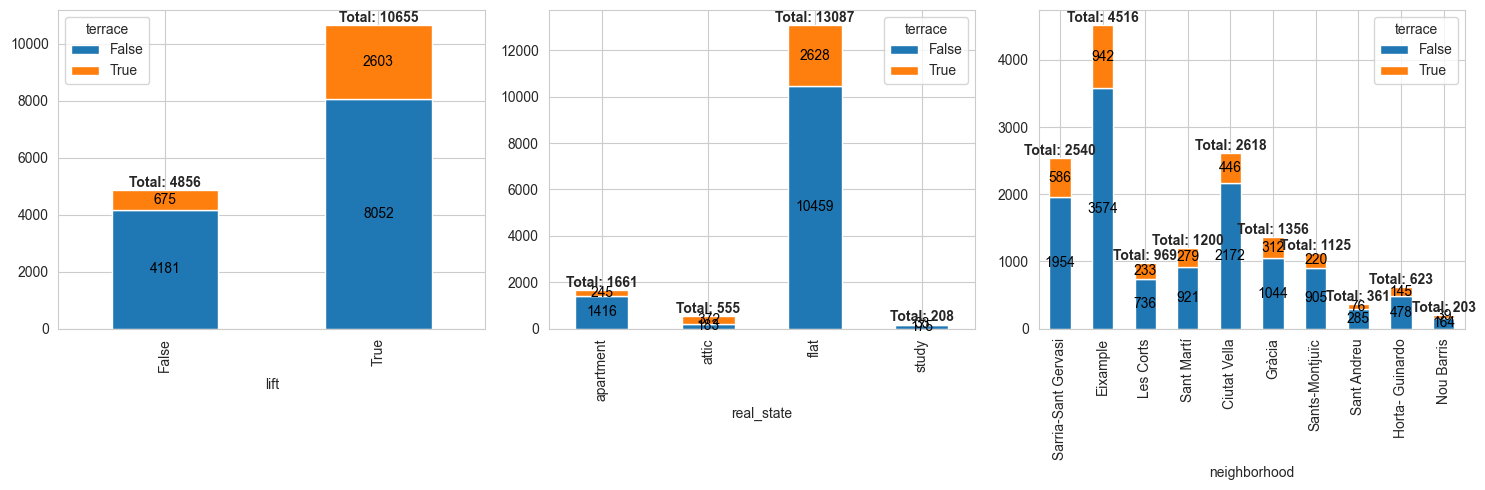

In [124]:
plot_crosstab_bar_count(df6, var_interest='terrace')

- Units with a terrace on the other hand, seem to be rare and very few have one

# Exploratory Data Analysis Consolidated Notes

**Functions**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category
- side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2): to present two side by side boxplot_by_group

**Univariate Analysis**
- 'price', 'square_meters' and 'square_meters_price' variables are right skewed and reflect the effect of capping outliers to upper whysker.
- Comparing original data (df) vs. prepared data (df6) is noticeable how in original data the numerical variables have float type values and many outliers, while in prepared data the numerical variables have integer values and no outliers.
- In the prepared data there are flats units with 4 rooms and 145m2 area.
- The variable 'real_state' have 918 imputed values (5.61%)
- In the original data there are flats units with 10.754 rooms and 679m2 area.
- The categorical variables are not balanced, with 84.4% of properties as "flats" and 78.8% of units concentrated in 50% of the sample neighbourhoods
- 75% of flats units have up to 3 bedrooms and up to 2 bathrooms with an average size of 85.48m2.
- 75% of the units in Eixample have up to 3 bedrooms and up to 2 bathrooms with an average size of 80.21m2.

**Bivariate Analysis**
- There are no couple of variables with high correlation (>75%)
- Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts
- Top 3 neighborhood by square_meters mean value are: Sarria-Sant Gervasi,Les Corts,Eixample
- Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample
- Top 3 real_state by price mean value are: apartment,attic,flat
- Top 3 real_state by square_meters mean value are: flat,attic,apartment
- Top 3 real_state by square_meters_price mean value are: apartment,study,attic
- From the perspective of price per square meter, the most attractive type of unit according to this data could be the **flat**, with an average surface area of ​78.67 m2 (just over the average 77.27 m2) and a price per square meter of 15.56 below the average (16.41)
- There are 3785 flats in Eixample, being the most popular unit type and neighborhood combination, with 83.81% of the units in Eixample being flats, and 28.92% of all flats are located at Eixample. 
- Across all neighborhoods, the unit type "flat" is the most popular with at least 79.76% of units by neighborhood
- Most types of units have a lift, in the case of flats the proportion is 72.12%
- Units with a terrace on the other hand, seem to be rare and very few have one

# 5. Modeling
Selecting and applying appropriate machine learning or statistical models. This step includes training, validating, and fine-tuning models to optimize their performance

# 6. Evaluation
Assessing the model's performance using metrics such as accuracy, precision, recall, or others relevant to the project. Ensuring the model meets the required standards for deployment.

# 7. Deployment
Implementing the model in a production environment, making it accessible for real-world use. This might involve integrating the model with existing systems or deploying it via APIs or cloud platforms.

# 8. Monitoring and Maintenance
Continuously monitoring the model's performance in production to ensure its accuracy and relevance over time. This stage may also involve retraining the model as new data becomes available.

# 9. Communication and Reporting
Presenting findings and results to stakeholders in a clear and actionable manner, often through dashboards, visualizations, or reports.

# PROJECT 1 REFERENCE CODE (OLD)

## Modeling

### Modeling Functions

In [423]:
# Define a function to evaluate and return the model's metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }
    return metrics

In [424]:
def models_regression_performance_cv_fit(models, x_train, y_train, x_test, y_test, res_df=None):
    """
    Function to compute different metrics to check regression model performance
    models: list of models to evaluate
    x_train, y_train: training set predictors and target
    x_test, y_test: validation set predictors and target
    res_df: dataframe to store performance metrics
    
    After fitting the model on the training data, the model is directly evaluated on the validation set.
    """
    
    # If results_df is not provided, create an empty dataframe
    if res_df is None:
        res_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
        
    # Store new rows in a list
    results_list = []
    
    # Perform cross-validation on the training set
    for name, model in models:
        # K-Fold cross-validation
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        
        # Cross-validation scores
        cv_mse = -cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kfold)
        cv_mae = -cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv=kfold)
        cv_r2 = cross_val_score(model, x_train, y_train, scoring="r2", cv=kfold)
        
        # Calculate mean values for each metric
        train_mse = cv_mse.mean()
        train_mae = cv_mae.mean()
        train_r2 = cv_r2.mean()

        # Add the new row with the provided metrics
        results_list.append({
            "Model": f"{name}_train", 
            "MAE": train_mae,
            "MSE": train_mse, 
            "RMSE": np.sqrt(train_mse), 
            "R2 Score": train_r2, 
        })

        # Fit model and predict on test data
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate test metrics
        test_mae = mean_absolute_error(y_test, y_pred)
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Add the new row with the provided metrics
        results_list.append({
            "Model": f"{name}_val", 
            "MAE": test_mae,
            "MSE": test_mse, 
            "RMSE": np.sqrt(test_mse), 
            "R2 Score": test_r2, 
        })
        
    # Concatenate the list of results to results_df
    res_df = pd.concat([res_df, pd.DataFrame(results_list)], ignore_index=True)
    
    return res_df

- Defined function "evaluate_model(model, x_test, y_test)", to evaluate and return the model's metrics into a results dataframe
- Defined function "models_regression_performance_cv_fit(models, x_train, y_train, x_test, y_test, res_df=None)", to compute different metrics to check regression model performance

### Preparing data for modeling

In [425]:
data=df5.copy()

- Data preparation for modeling over a copy named "data"

In [426]:
# specifying the independent  and dependent variables
X = data.drop(["price"], axis=1)
y = data["price"]

# Checking independant and dependant shapes
print("Shape of independant variables : ", X.shape)
print("Shape of target variable : ", y.shape)


Shape of independant variables :  (7742, 21)
Shape of target variable :  (7742,)


In [427]:
X.head()

,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_apartment,real_state_attic,real_state_flat,real_state_study,...,neighborhood_Sarria-Sant Gervasi,neighborhood_Les Corts,neighborhood_Eixample,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Horta- Guinardo,neighborhood_Sant Andreu,neighborhood_Nou Barris
0,3.0,1,1,0,60,12.500000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,1,1,0,59,13.050847,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1,1,1,30,28.384073,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,1,1,1,70,28.384073,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,1,1,0,44,16.363636,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [428]:
# Apply Scaling to Input
input_scaler = MinMaxScaler()
X = pd.DataFrame(input_scaler.fit_transform(X), columns=X.columns)


In [429]:

# Apply Scaling to Output (target variable)
output_scaler = MinMaxScaler()
y = pd.DataFrame(output_scaler.fit_transform(y.values.reshape(-1, 1)), columns=["price"])

- Min-Max scaling was applied. The dataset has features with different scales, normalization ensures that no feature dominates the learning process.

In [430]:

# adding a constant to the independent variables
X = sm.add_constant(X)


In [431]:
X.head()

,const,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_apartment,real_state_attic,real_state_flat,...,neighborhood_Sarria-Sant Gervasi,neighborhood_Les Corts,neighborhood_Eixample,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Horta- Guinardo,neighborhood_Sant Andreu,neighborhood_Nou Barris
0,1.0,0.625,0.0,1.0,0.0,0.370370,0.304200,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.375,0.0,1.0,0.0,0.362963,0.328330,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.125,0.0,1.0,1.0,0.148148,1.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.125,0.0,1.0,1.0,0.444444,1.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.375,0.0,1.0,0.0,0.251852,0.473446,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [432]:
X['const'].value_counts()

const
1.0    7742
Name: count, dtype: int64

- Added constant for modeling

In [433]:

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


# Checking training and test sets.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training predictions : ", y_train.shape)
print("Shape of test predictions : ", y_test.shape)

Shape of Training set :  (5419, 22)
Shape of test set :  (2323, 22)
Shape of Training predictions :  (5419, 1)
Shape of test predictions :  (2323, 1)


In [434]:
X_train.head()

,const,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_apartment,real_state_attic,real_state_flat,...,neighborhood_Sarria-Sant Gervasi,neighborhood_Les Corts,neighborhood_Eixample,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Horta- Guinardo,neighborhood_Sant Andreu,neighborhood_Nou Barris
280,1.0,1.000,1.0,1.0,0.0,1.000000,0.501322,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026,1.0,0.875,1.0,1.0,0.0,1.000000,0.851761,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,1.0,0.125,0.0,1.0,0.0,0.259259,0.632737,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7525,1.0,0.875,0.0,0.0,0.0,0.481481,0.369908,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,1.0,0.875,0.5,1.0,1.0,0.666667,0.361147,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Data split 70/30. Shape of Training set :  (5419, 22), Shape of test set :  (2323, 22)

### Model Building

In [435]:

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

- Performance Metrics:
    - **MAE** (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
    - **MSE** (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
    - **RMSE** (Root Mean Squared Error): The square root of MSE, providing error in the same units as the target variable.
    - **R2 Score** (Coefficient of Determination): Indicates how well the model's predictions approximate the real data points. A value closer to 1 indicates a better fit.


In [436]:
# Dictionary of regression models to try
regression_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()}

- Evaluated the following regression models:
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - Decision Tree
    - Random Forest
    - K-Nearest Neighbors
    - Support Vector Regressor

In [437]:
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [438]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [439]:
results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [440]:
results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [441]:
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


- **Random Forest**: Best Performance. It has the lowest MAE (0.007321), MSE (0.000585), and RMSE (0.024185), and the highest R2 Score (0.990246), indicating it is the most accurate model among the ones tested.
- **Decision Tree**: Second Best. It also performs very well with low MAE, MSE, and RMSE, and a high R2 Score.
- **Support Vector Regressor (SVR)**: Good Performance. It has a relatively low MAE, MSE, and RMSE, with a high R2 Score.
- Linear Regression and Ridge Regression: Similar Performance. Both have similar values for all metrics indicating decent performance.
- K-Nearest Neighbors (KNN): Moderate Performance. It has higher MAE, MSE, and RMSE, with a lower R2 Score, indicating it is less accurate compared to the top models.
- Lasso Regression: Poor Performance: It has the worst (highest) MAE, MSE, and RMSE, with a negative R2 Score, indicating it performs poorly on this dataset.

### Model Tuning

In [442]:
%%time
# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)



Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
CPU times: total: 5.67 s
Wall time: 3min 47s


In [443]:
%%time
# Define the model
dt = DecisionTreeRegressor()

# Define the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters for Decision Tree:", best_params)


Best parameters for Decision Tree: {'min_samples_split': 5, 'max_depth': 20, 'criterion': 'friedman_mse'}
CPU times: total: 391 ms
Wall time: 1.14 s


In [444]:
%%time
# Define the model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for SVR:", best_params)


Best parameters for SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
CPU times: total: 1.03 s
Wall time: 1min 20s


In [445]:
# Dictionary of regression models tuned
regression_models_tuned = {
    "Tuned Random Forest": RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=300),
    "Tuned Decision Tree": DecisionTreeRegressor(min_samples_split= 5, max_depth= 20, criterion='friedman_mse'),
    "Tuned Support Vector Regressor": SVR(C= 100, gamma='scale', kernel='rbf')}

- The three best performing models were selected for model tuning: Random Forest, Decision Tree, and Support Vector Regression.

In [446]:
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models_tuned.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [447]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
4,Random Forest,0.007321,0.000585,0.024185,0.990246
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
9,Tuned Support Vector Regressor,0.040213,0.002837,0.053267,0.952687
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [448]:
results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
9,Tuned Support Vector Regressor,0.040213,0.002837,0.053267,0.952687
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [449]:
results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
4,Random Forest,0.007321,0.000585,0.024185,0.990246
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
9,Tuned Support Vector Regressor,0.040213,0.002837,0.053267,0.952687
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [450]:
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
4,Random Forest,0.007321,0.000585,0.024185,0.990246
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
9,Tuned Support Vector Regressor,0.040213,0.002837,0.053267,0.952687
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


- After hyperparameter tuning, **Tuned Random Forest**, **Random Forest**, and **Tuned Decision Tree** are the best performing models
- The 3 best performing models after hyperparameter tuning will be evaluated with CrossValidation

### Model Validation

In [451]:
# Splitting data into training, validation and test set (60-20-20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)

(4644, 22) (1549, 22) (1549, 22)


- 60-20-20 data split for training-validation-testing

In [455]:
# List of models to evaluate
top3models = [
    ("Tuned Random Forest_cv", RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=300)),
    ("Random Forest_cv", RandomForestRegressor()),
    ("Tuned Decision Tree_cv", DecisionTreeRegressor(min_samples_split= 5, max_depth= 20, criterion='friedman_mse'))
    ]

In [456]:
res_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [457]:
top3models= models_regression_performance_cv_fit(top3models, X_train, y_train, X_val, y_val,res_df)

In [458]:
top3models.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
0,Tuned Random Forest_cv_train,0.008073,0.000570,0.023871,0.990497
2,Random Forest_cv_train,0.008088,0.000589,0.024270,0.990342
1,Tuned Random Forest_cv_val,0.008124,0.000651,0.025522,0.989572
3,Random Forest_cv_val,0.008107,0.000652,0.025542,0.989556
4,Tuned Decision Tree_cv_train,0.012006,0.000972,0.031180,0.983627
5,Tuned Decision Tree_cv_val,0.011874,0.001130,0.033613,0.981912


- **Tuned Random Forest** is the best performing model among the cross-validated models

In [459]:

final_results_df = pd.concat([results_df, top3models], ignore_index=True)
final_results_df


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.042146,0.004032,0.063495,0.932773
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026
2,Ridge Regression,0.042285,0.004047,0.063619,0.932510
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
4,Random Forest,0.007321,0.000585,0.024185,0.990246
5,K-Nearest Neighbors,0.059559,0.009189,0.095859,0.846773
6,Support Vector Regressor,0.043635,0.003353,0.057902,0.944096
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
9,Tuned Support Vector Regressor,0.040213,0.002837,0.053267,0.952687


In [460]:
# Display the results DataFrame
final_results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
10,Tuned Random Forest_cv_train,0.008073,0.000570,0.023871,0.990497
12,Random Forest_cv_train,0.008088,0.000589,0.024270,0.990342
4,Random Forest,0.007321,0.000585,0.024185,0.990246
11,Tuned Random Forest_cv_val,0.008124,0.000651,0.025522,0.989572
13,Random Forest_cv_val,0.008107,0.000652,0.025542,0.989556
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
14,Tuned Decision Tree_cv_train,0.012006,0.000972,0.031180,0.983627
15,Tuned Decision Tree_cv_val,0.011874,0.001130,0.033613,0.981912


In [461]:
final_results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007321,0.000585,0.024185,0.990246
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
10,Tuned Random Forest_cv_train,0.008073,0.000570,0.023871,0.990497
12,Random Forest_cv_train,0.008088,0.000589,0.024270,0.990342
13,Random Forest_cv_val,0.008107,0.000652,0.025542,0.989556
11,Tuned Random Forest_cv_val,0.008124,0.000651,0.025522,0.989572
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
15,Tuned Decision Tree_cv_val,0.011874,0.001130,0.033613,0.981912
14,Tuned Decision Tree_cv_train,0.012006,0.000972,0.031180,0.983627


In [462]:
final_results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
10,Tuned Random Forest_cv_train,0.008073,0.000570,0.023871,0.990497
4,Random Forest,0.007321,0.000585,0.024185,0.990246
12,Random Forest_cv_train,0.008088,0.000589,0.024270,0.990342
11,Tuned Random Forest_cv_val,0.008124,0.000651,0.025522,0.989572
13,Random Forest_cv_val,0.008107,0.000652,0.025542,0.989556
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
14,Tuned Decision Tree_cv_train,0.012006,0.000972,0.031180,0.983627
15,Tuned Decision Tree_cv_val,0.011874,0.001130,0.033613,0.981912


In [463]:
final_results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007344,0.000561,0.023676,0.990653
10,Tuned Random Forest_cv_train,0.008073,0.000570,0.023871,0.990497
4,Random Forest,0.007321,0.000585,0.024185,0.990246
12,Random Forest_cv_train,0.008088,0.000589,0.024270,0.990342
11,Tuned Random Forest_cv_val,0.008124,0.000651,0.025522,0.989572
13,Random Forest_cv_val,0.008107,0.000652,0.025542,0.989556
8,Tuned Decision Tree,0.010478,0.000859,0.029309,0.985676
3,Decision Tree,0.010219,0.000944,0.030730,0.984253
14,Tuned Decision Tree_cv_train,0.012006,0.000972,0.031180,0.983627
15,Tuned Decision Tree_cv_val,0.011874,0.001130,0.033613,0.981912


- From all models evaluated, **Tuned Random Forest** turns out to be **the best performing model**

### Consolidated notes on Modeling

- Defined function "evaluate_model(model, x_test, y_test)", to evaluate and return the model's metrics into a results dataframe
- Defined function "models_regression_performance_cv_fit(models, x_train, y_train, x_test, y_test, res_df=None)", to compute different metrics to check regression model performance
- Data preparation for modeling over a copy named "data"
- Min-Max scaling was applied. The dataset has features with different scales, normalization ensures that no feature dominates the learning process.
- Added constant for modeling
- Data split 70/30. Shape of Training set :  (5419, 22), Shape of test set :  (2323, 22)
- Performance Metrics:
    - MAE (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
    - MSE (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
    - RMSE (Root Mean Squared Error): The square root of MSE, providing error in the same units as the target variable.
    - R2 Score (Coefficient of Determination): Indicates how well the model's predictions approximate the real data points. A value closer to 1 indicates a better fit.
- Evaluated the following regression models:
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - Decision Tree
    - Random Forest
    - K-Nearest Neighbors
    - Support Vector Regressor
- **Random Forest**: Best Performance. It has the lowest MAE (0.007321), MSE (0.000585), and RMSE (0.024185), and the highest R2 Score (0.990246), indicating it is the most accurate model among the ones tested.
- **Decision Tree**: Second Best. It also performs very well with low MAE, MSE, and RMSE, and a high R2 Score.
- **Support Vector Regressor (SVR)**: Good Performance. It has a relatively low MAE, MSE, and RMSE, with a high R2 Score.
- Linear Regression and Ridge Regression: Similar Performance. Both have similar values for all metrics indicating decent performance.
- K-Nearest Neighbors (KNN): Moderate Performance. It has higher MAE, MSE, and RMSE, with a lower R2 Score, indicating it is less accurate compared to the top models.
- Lasso Regression: Poor Performance: It has the worst (highest) MAE, MSE, and RMSE, with a negative R2 Score, indicating it performs poorly on this dataset.
- The three best performing models were selected for model tuning: Random Forest, Decision Tree, and Support Vector Regression.
- After hyperparameter tuning, **Tuned Random Forest**, **Random Forest**, and **Tuned Decision Tree** are the best performing models
- The 3 best performing models after hyperparameter tuning will be evaluated with CrossValidation
- 60-20-20 data split for training-validation-testing
- **Tuned Random Forest** is the best performing model among the cross-validated models
- From all models evaluated, **Tuned Random Forest** turns out to be **the best performing model**

### Final Model

In [464]:
# Define the model with the selected hyperparameters
RandomForestTuned = RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=300)

# Train the model on the entire training dataset
RandomForestTuned.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = RandomForestTuned.predict(X_test)

In [465]:
evaluate_model(RandomForestTuned, X_test, y_test)

{'MAE': np.float64(0.007490556570714266),
 'MSE': np.float64(0.0005540728556713073),
 'RMSE': np.float64(0.023538752211434387),
 'R2 Score': 0.9905977292708693}

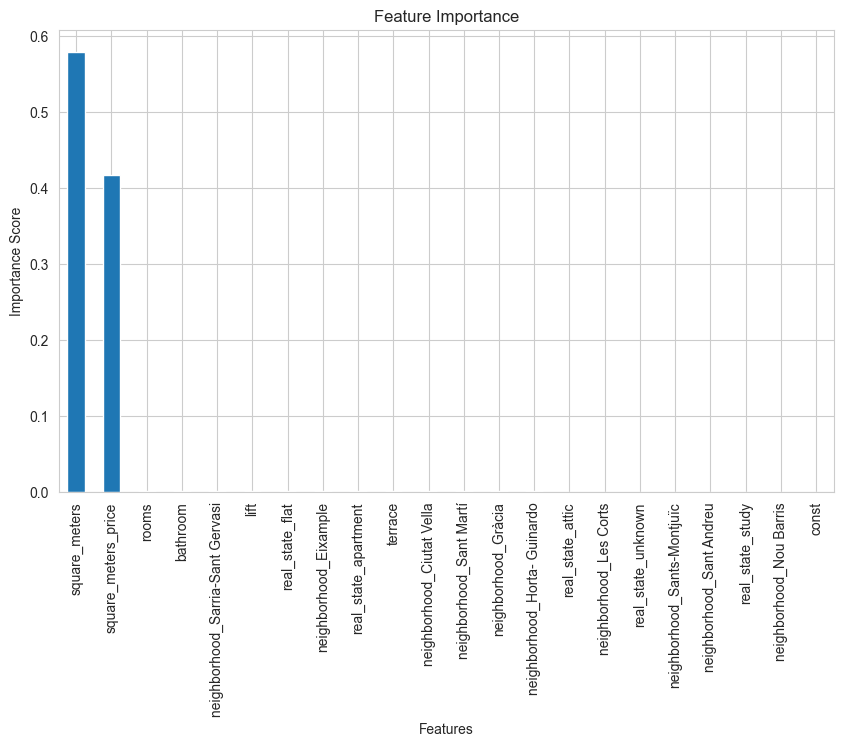

In [466]:
# Feature importance
feature_importances = pd.Series(RandomForestTuned.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


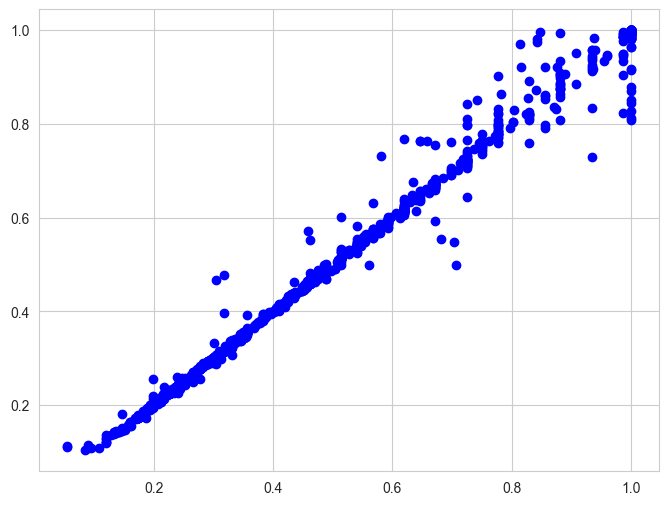

In [467]:
# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.show()


## Conclusions

- square_meters is the most important variable to predict unit price and at least an aproximated value should by provided as input.
- Having square_meters_price as the second most important variable, and considering it might be an unknown input, the model could consider mean by to inpute.
- The most accurate model identified to predict price is: RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=300)
- With this model the performance achieved is MAE:0.00749, MSE:0.000554, RMSE:0.023538, and R2 Score: 0.990597
- Results obtained with scaled data (Min-Max scaling)

****************

## Deploy

In [470]:
# Save model and scaler
joblib.dump(RandomForestTuned, "Random_Forest_Tuned.pkl")


['Random_Forest_Tuned.pkl']

In [471]:
joblib.dump(input_scaler, "Input_scaler.pkl")


['Input_scaler.pkl']

In [472]:
joblib.dump(output_scaler, "Output_scaler.pkl")

['Output_scaler.pkl']

- Using the joblib library in Python to save Python objects like machine learning models, scalers, and other data-processing objects to disk.
- It allows to efficiently store these objects and later reload them for future use, avoiding the need to retrain models or reinitialize objects.
- joblib is commonly used for saving trained models because it’s optimized for handling large amounts of data, especially with NumPy arrays or objects from scikit-learn.

In [1]:
!jupyter nbconvert --to html PROJECT1_TEAM2_041124.ipynb

C:\Users\otroc\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook PROJECT1_TEAM2_041124.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 4377595 bytes to PROJECT1_TEAM2_041124.html
